**EV FİYAT TAHMİN MODELİ**

**İş Problemi:** Her bir eve ait özelliklerin ve ev fiyatlarının bulunduğu veriseti kullanılarak, farklı tipteki evlerin fiyatlarına ilişkin bir makine öğrenmesi projesi gerçekleştirilmek istenmektedir.


**Görev:** Elimizdeki veri seti üzerinden minimum hata ile ev fiyatlarını tahmin eden bir makine öğrenmesi modeli geliştiriniz.


In [1]:
# NOT:Makine öğrenmesi yöntemlerinden biri olan Supervised Learning'i uygulayacağız.
# NOT: Regresyon modeli kuracağız.

In [ ]:
# Kütüphanelerin import edilmesi

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
!pip install catboost
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV

In [3]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

In [4]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Görev 1: Veri setine EDA işlemlerini uygulayınız.

In [5]:
# 1. Genel Resim
# 2. Kategorik Değişken Analizi (Analysis of Categorical Variables)
# 3. Sayısal Değişken Analizi (Analysis of Numerical Variables)
# 4. Hedef Değişken Analizi (Analysis of Target Variable)
# 5. Korelasyon Analizi (Analysis of Correlation)

In [6]:
# Train ve Test veri setlerini okutup birleştiriniz. Birleştirdiğiniz veri üzerinden ilerleyiniz.

In [8]:
train = pd.read_csv("/content/train.csv")

In [9]:
test = pd.read_csv("/content/test.csv")

In [10]:
df = train.append(test, ignore_index=False).reset_index()

In [11]:
df.head()

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706.000,Unf,0.000,150.000,856.000,GasA,Ex,Y,SBrkr,856,854,0,1710,1.000,0.000,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2.000,548.000,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.000
1,1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.000,Unf,0.000,284.000,1262.000,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.000,1.000,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2.000,460.000,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.000
2,2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.000,Unf,0.000,434.000,920.000,GasA,Ex,Y,SBrkr,920,866,0,1786,1.000,0.000,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2.000,608.000,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.000
3,3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216.000,Unf,0.000,540.000,756.000,GasA,Gd,Y,SBrkr,961,756,0,1717,1.000,0.000,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3.000,642.000,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.000
4,4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655.000,Unf,0.000,490.000,1145.000,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.000,0.000,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3.000,836.000,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.000


In [12]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,CBlock,TA,TA,No,Rec,468.000,LwQ,144.000,270.000,882.000,GasA,TA,Y,SBrkr,896,0,0,896,0.000,0.000,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.000,Unf,1.000,730.000,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.000,TA,TA,CBlock,TA,TA,No,ALQ,923.000,Unf,0.000,406.000,1329.000,GasA,TA,Y,SBrkr,1329,0,0,1329,0.000,0.000,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.000,Unf,1.000,312.000,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,PConc,Gd,TA,No,GLQ,791.000,Unf,0.000,137.000,928.000,GasA,Gd,Y,SBrkr,928,701,0,1629,0.000,0.000,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.000,Fin,2.000,482.000,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.000,TA,TA,PConc,TA,TA,No,GLQ,602.000,Unf,0.000,324.000,926.000,GasA,Ex,Y,SBrkr,926,678,0,1604,0.000,0.000,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.000,Fin,2.000,470.000,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.000,Gd,TA,PConc,Gd,TA,No,ALQ,263.000,Unf,0.000,1017.000,1280.000,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.000,0.000,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.000,RFn,2.000,506.000,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [14]:
df = df.drop("index", axis=1)

In [16]:
# 1. Genel Resim

In [17]:
def check_df(dataframe):

    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(3))
    print("##################### Tail #####################")
    print(dataframe.tail(3))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(2919, 81)
##################### Types #####################
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 81, dtype: object
##################### Head #####################
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL       65.000     8450   Pave   NaN      Reg   
1   2          20       RL       80.000     9600   Pave   NaN      Reg   
2   3          60       RL       68.000    11250   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    In

In [18]:
# Aykırı değerlerin veriden uzaklaştırılması
df = df.loc[df["SalePrice"]<=400000,]

In [19]:
check_df(df)

##################### Shape #####################
(1432, 81)
##################### Types #####################
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 81, dtype: object
##################### Head #####################
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL       65.000     8450   Pave   NaN      Reg   
1   2          20       RL       80.000     9600   Pave   NaN      Reg   
2   3          60       RL       68.000    11250   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    In

In [20]:
# Numerik ve Kategorik Değişkenlerin Yakalanması

In [21]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    grab_col_names for given dataframe

    :param dataframe:
    :param cat_th:
    :param car_th:
    :return:
    """

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    # cat_cols + num_cols + cat_but_car = değişken sayısı.
    # num_but_cat cat_cols'un içerisinde zaten.
    # dolayısıyla tüm şu 3 liste ile tüm değişkenler seçilmiş olacaktır: cat_cols + num_cols + cat_but_car
    # num_but_cat sadece raporlama için verilmiştir.

    return cat_cols, cat_but_car, num_cols

cat_cols, cat_but_car, num_cols = grab_col_names(df)


Observations: 1432
Variables: 81
cat_cols: 53
num_cols: 27
cat_but_car: 1
num_but_cat: 11


In [ ]:
# 2. Kategorik Değişken Analizi (Analysis of Categorical Variables)

         MSZoning  Ratio
RL           1124 78.492
RM            217 15.154
FV             65  4.539
RH             16  1.117
C (all)        10  0.698


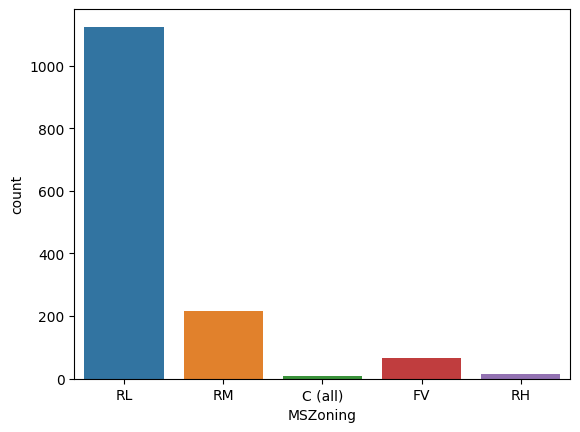

      Street  Ratio
Pave    1426 99.581
Grvl       6  0.419


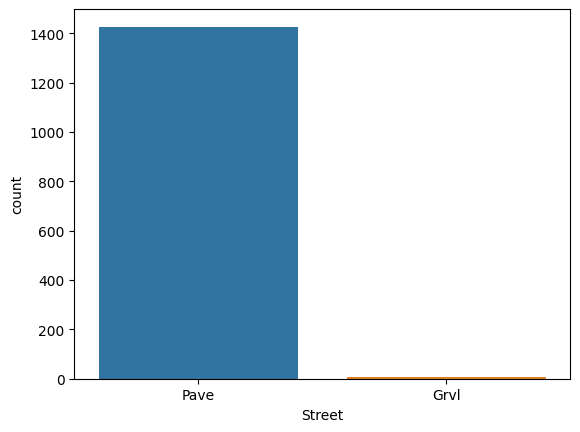

      Alley  Ratio
Grvl     50  3.492
Pave     41  2.863


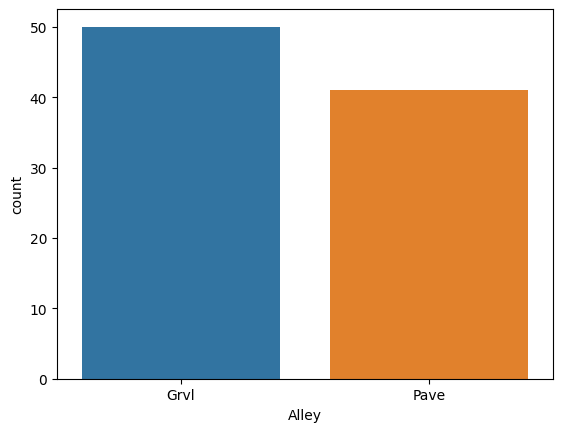

     LotShape  Ratio
Reg       916 63.966
IR1       471 32.891
IR2        35  2.444
IR3        10  0.698


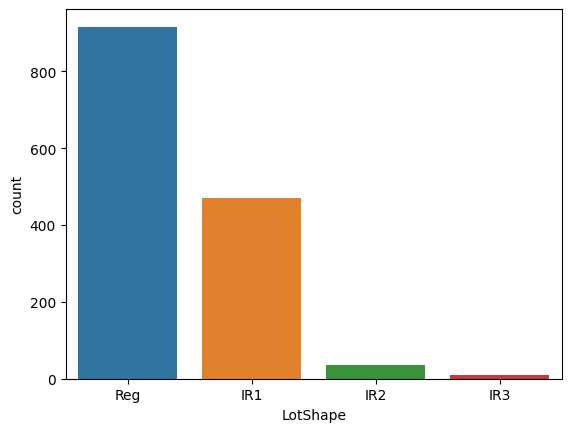

     LandContour  Ratio
Lvl         1285 89.735
Bnk           63  4.399
HLS           48  3.352
Low           36  2.514


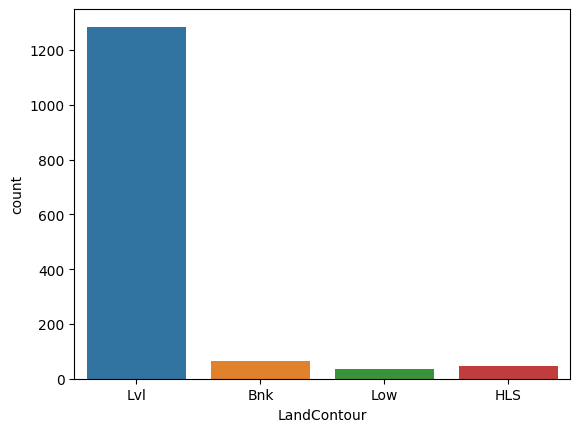

        Utilities  Ratio
AllPub       1431 99.930
NoSeWa          1  0.070


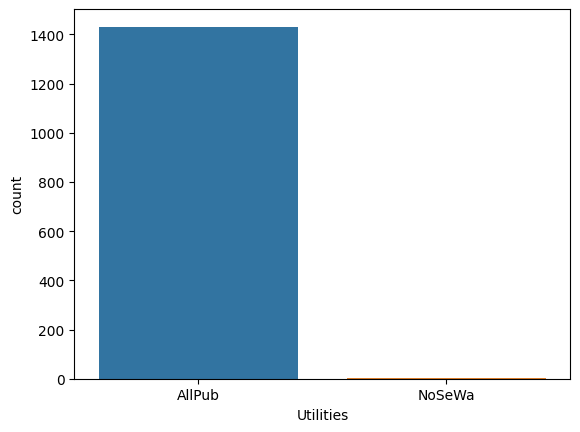

         LotConfig  Ratio
Inside        1034 72.207
Corner         260 18.156
CulDSac         87  6.075
FR2             47  3.282
FR3              4  0.279


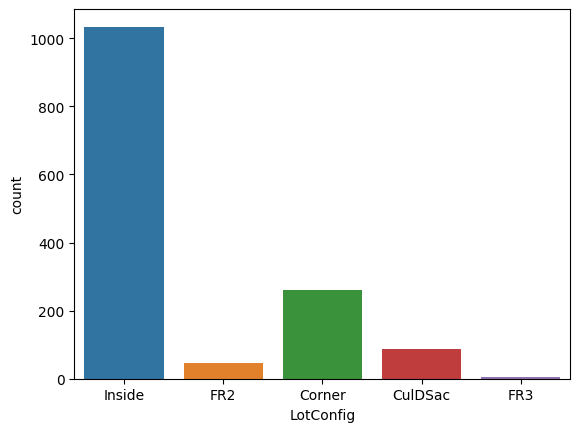

     LandSlope  Ratio
Gtl       1355 94.623
Mod         64  4.469
Sev         13  0.908


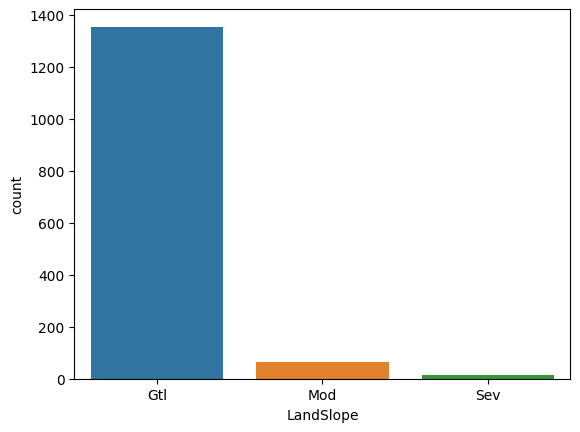

        Condition1  Ratio
Norm          1234 86.173
Feedr           81  5.656
Artery          47  3.282
RRAn            25  1.746
PosN            19  1.327
RRAe            11  0.768
PosA             8  0.559
RRNn             5  0.349
RRNe             2  0.140


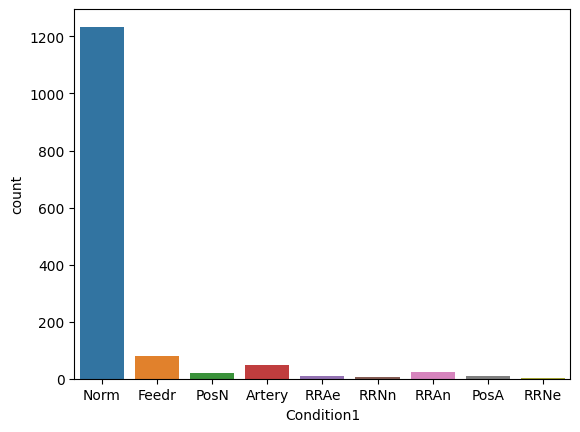

        Condition2  Ratio
Norm          1417 98.953
Feedr            6  0.419
Artery           2  0.140
RRNn             2  0.140
PosN             2  0.140
PosA             1  0.070
RRAn             1  0.070
RRAe             1  0.070


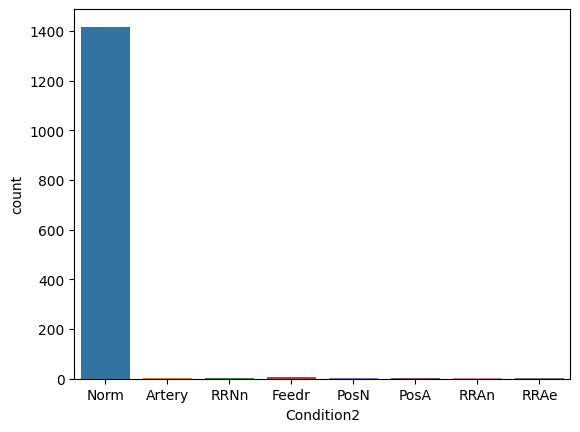

        BldgType  Ratio
1Fam        1192 83.240
TwnhsE       114  7.961
Duplex        52  3.631
Twnhs         43  3.003
2fmCon        31  2.165


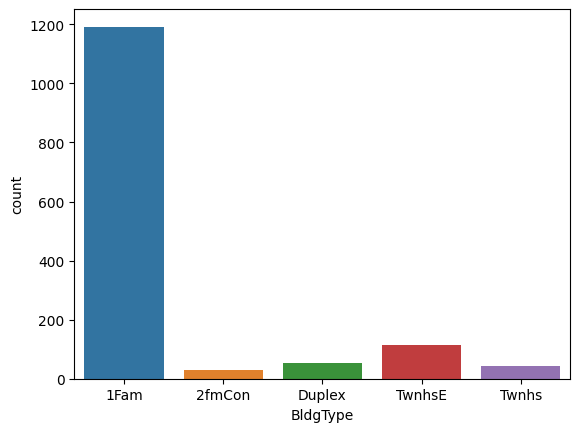

        HouseStyle  Ratio
1Story         716 50.000
2Story         429 29.958
1.5Fin         153 10.684
SLvl            65  4.539
SFoyer          37  2.584
1.5Unf          14  0.978
2.5Unf          11  0.768
2.5Fin           7  0.489


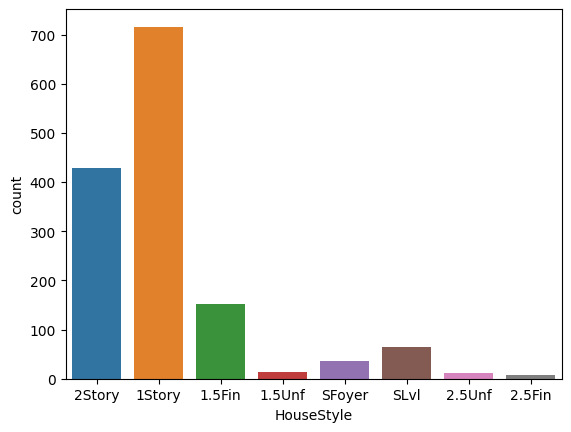

         RoofStyle  Ratio
Gable         1131 78.980
Hip            268 18.715
Flat            13  0.908
Gambrel         11  0.768
Mansard          7  0.489
Shed             2  0.140


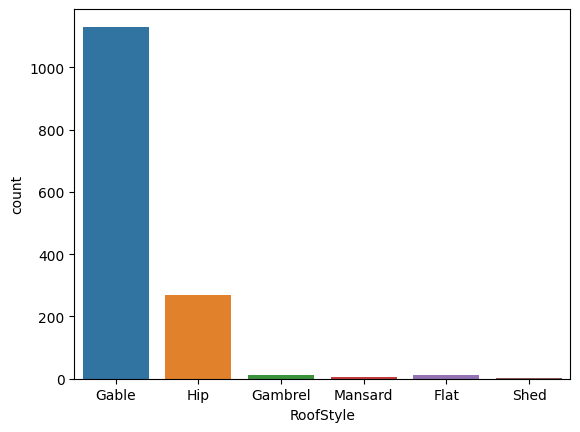

         RoofMatl  Ratio
CompShg      1408 98.324
Tar&Grv        11  0.768
WdShake         5  0.349
WdShngl         4  0.279
Metal           1  0.070
Membran         1  0.070
Roll            1  0.070
ClyTile         1  0.070


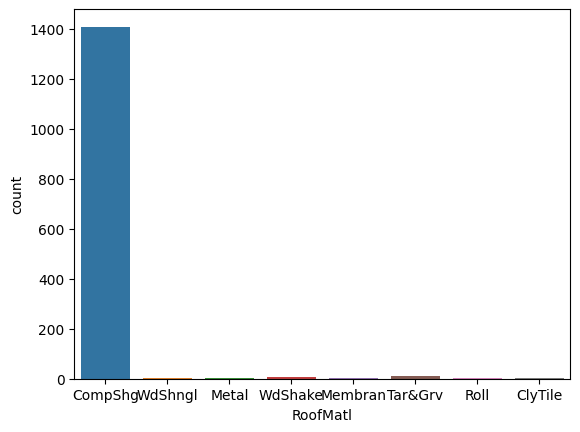

         Exterior1st  Ratio
VinylSd          498 34.777
MetalSd          220 15.363
HdBoard          220 15.363
Wd Sdng          204 14.246
Plywood          108  7.542
CemntBd           55  3.841
BrkFace           49  3.422
WdShing           26  1.816
Stucco            25  1.746
AsbShng           20  1.397
BrkComm            2  0.140
Stone              2  0.140
AsphShn            1  0.070
ImStucc            1  0.070
CBlock             1  0.070


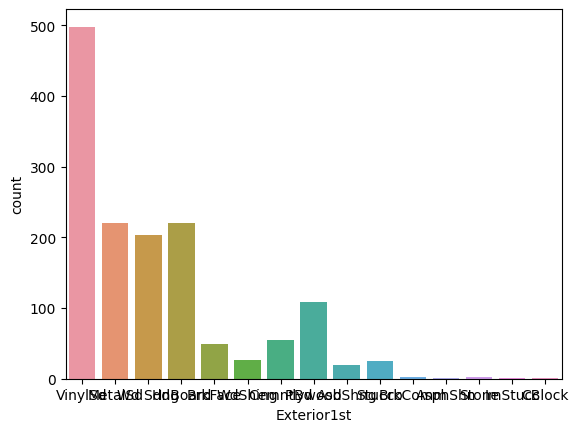

         Exterior2nd  Ratio
VinylSd          487 34.008
MetalSd          214 14.944
HdBoard          205 14.316
Wd Sdng          196 13.687
Plywood          142  9.916
CmentBd           55  3.841
Wd Shng           37  2.584
Stucco            26  1.816
BrkFace           24  1.676
AsbShng           20  1.397
ImStucc            9  0.628
Brk Cmn            7  0.489
Stone              5  0.349
AsphShn            3  0.209
Other              1  0.070
CBlock             1  0.070


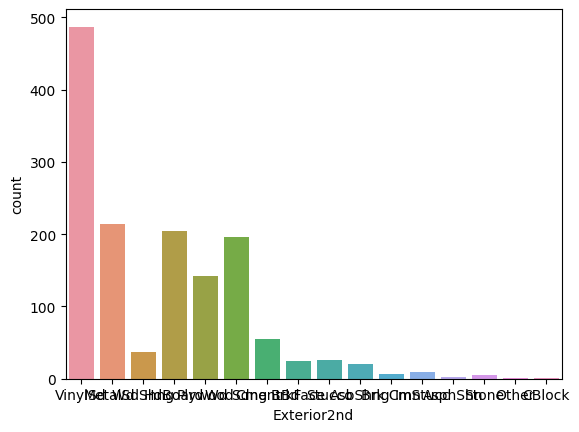

         MasVnrType  Ratio
None            860 60.056
BrkFace         432 30.168
Stone           118  8.240
BrkCmn           15  1.047


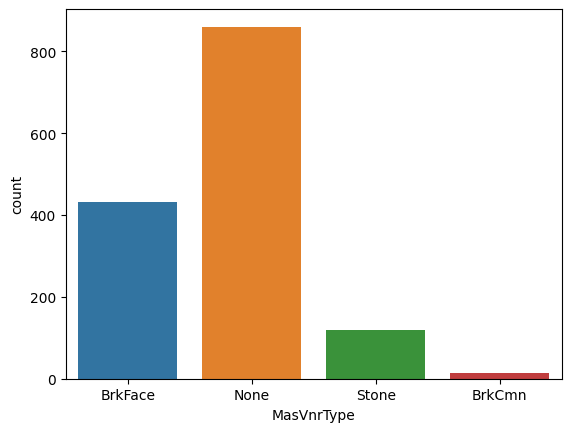

    ExterQual  Ratio
TA        906 63.268
Gd        476 33.240
Ex         36  2.514
Fa         14  0.978


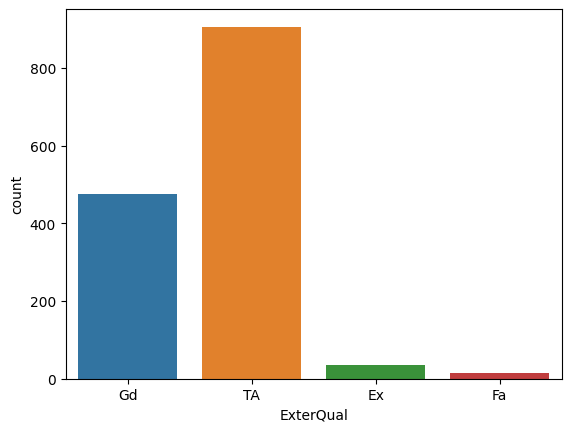

    ExterCond  Ratio
TA       1256 87.709
Gd        144 10.056
Fa         28  1.955
Ex          3  0.209
Po          1  0.070


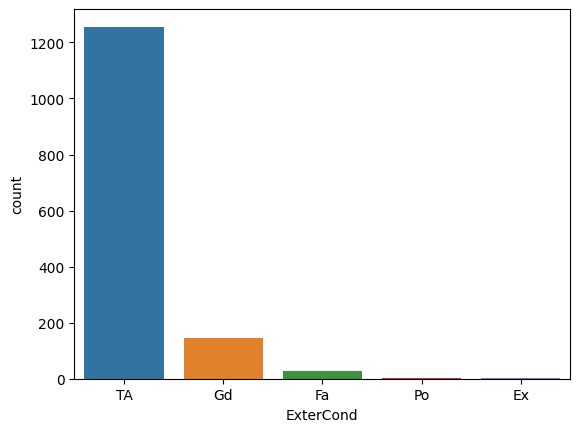

        Foundation  Ratio
CBlock         633 44.204
PConc          621 43.366
BrkTil         145 10.126
Slab            24  1.676
Stone            6  0.419
Wood             3  0.209


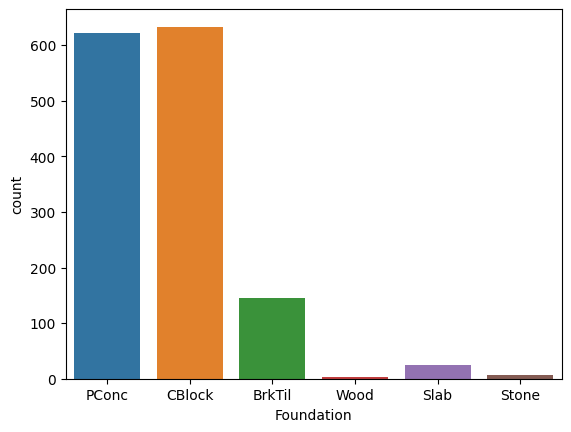

    BsmtQual  Ratio
TA       648 45.251
Gd       613 42.807
Ex        99  6.913
Fa        35  2.444


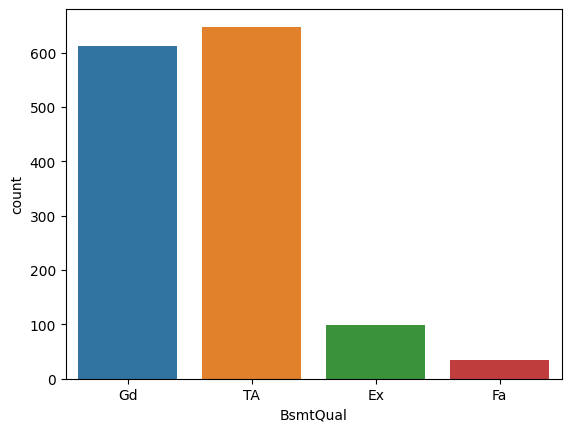

    BsmtCond  Ratio
TA      1285 89.735
Gd        63  4.399
Fa        45  3.142
Po         2  0.140


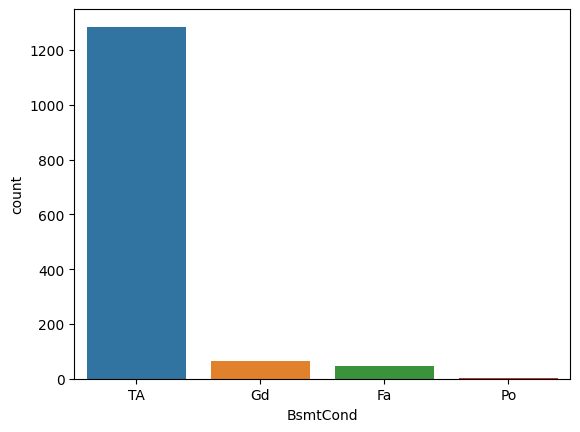

    BsmtExposure  Ratio
No           946 66.061
Av           215 15.014
Gd           121  8.450
Mn           112  7.821


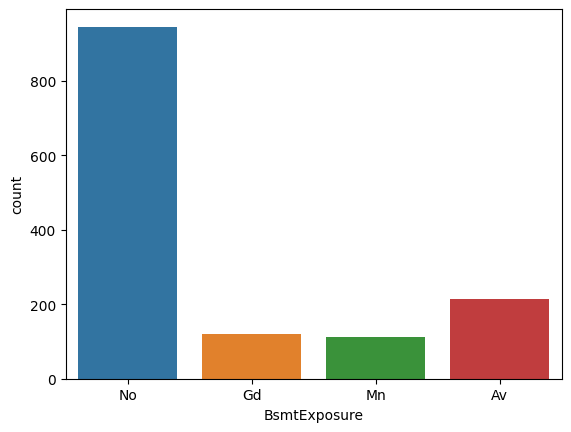

     BsmtFinType1  Ratio
Unf           425 29.679
GLQ           396 27.654
ALQ           219 15.293
BLQ           148 10.335
Rec           133  9.288
LwQ            74  5.168


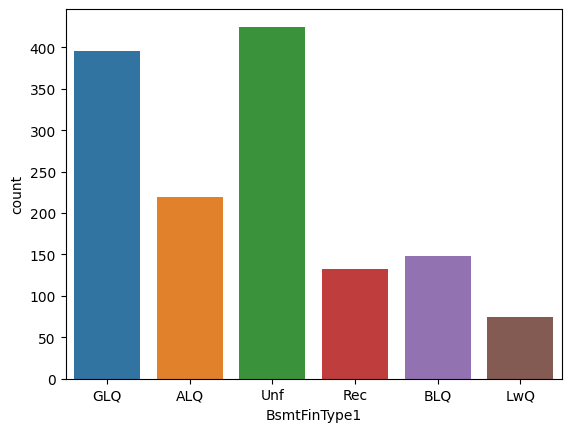

     BsmtFinType2  Ratio
Unf          1230 85.894
Rec            53  3.701
LwQ            46  3.212
BLQ            33  2.304
ALQ            18  1.257
GLQ            14  0.978


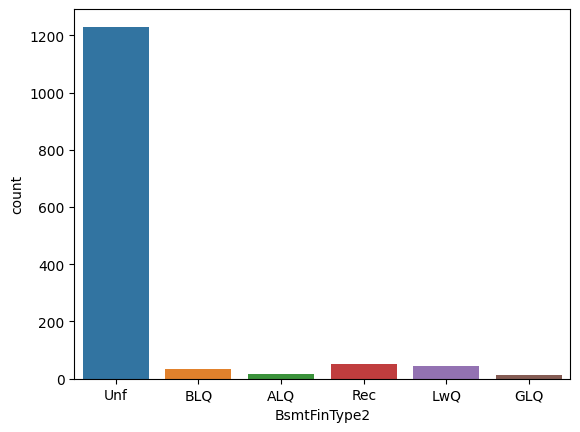

       Heating  Ratio
GasA      1400 97.765
GasW        18  1.257
Grav         7  0.489
Wall         4  0.279
OthW         2  0.140
Floor        1  0.070


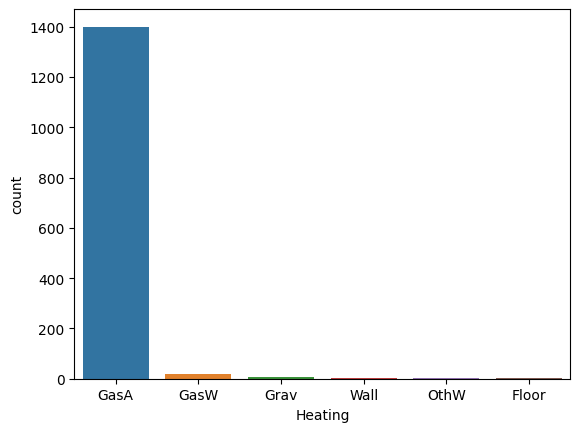

    HeatingQC  Ratio
Ex        713 49.791
TA        428 29.888
Gd        241 16.830
Fa         49  3.422
Po          1  0.070


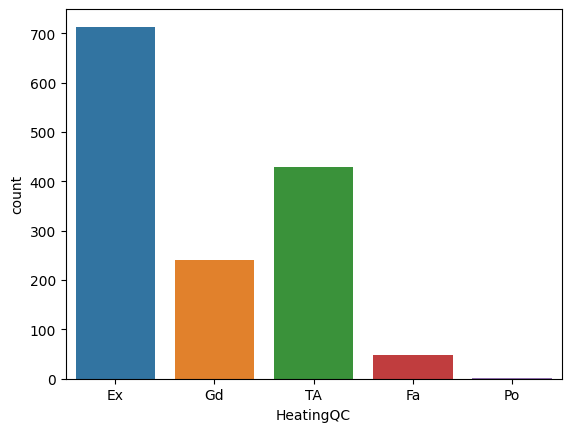

   CentralAir  Ratio
Y        1337 93.366
N          95  6.634


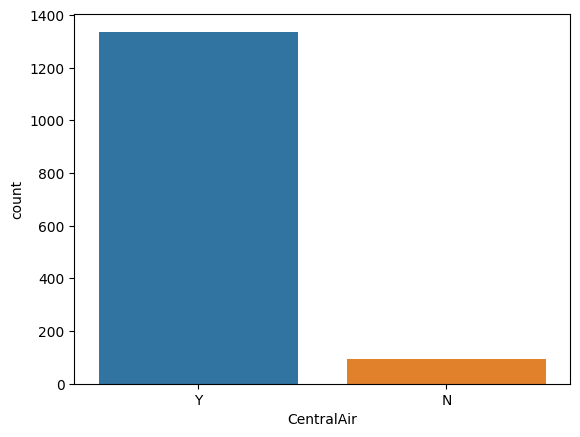

       Electrical  Ratio
SBrkr        1306 91.201
FuseA          94  6.564
FuseF          27  1.885
FuseP           3  0.209
Mix             1  0.070


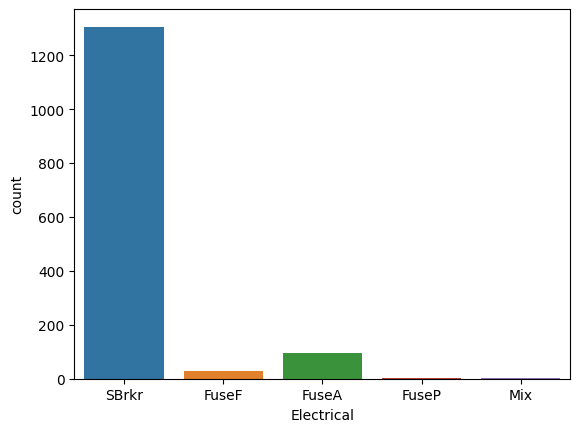

    KitchenQual  Ratio
TA          735 51.327
Gd          579 40.433
Ex           79  5.517
Fa           39  2.723


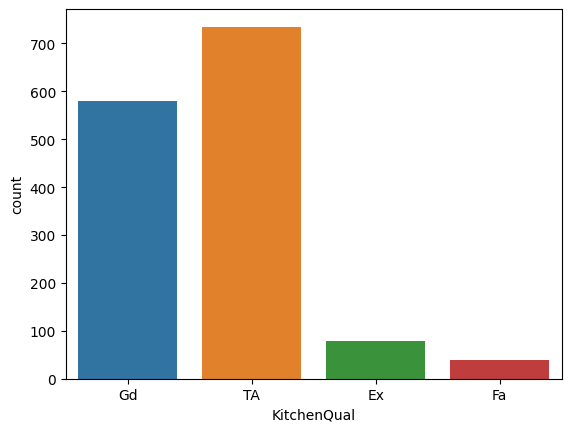

      Functional  Ratio
Typ         1333 93.087
Min2          34  2.374
Min1          31  2.165
Maj1          14  0.978
Mod           14  0.978
Maj2           5  0.349
Sev            1  0.070


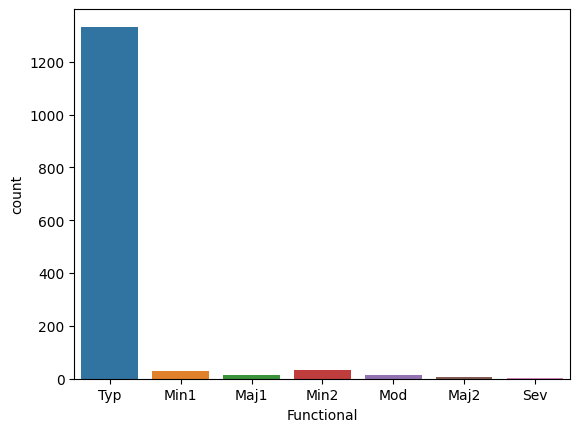

    FireplaceQu  Ratio
Gd          365 25.489
TA          307 21.439
Fa           33  2.304
Po           20  1.397
Ex           17  1.187


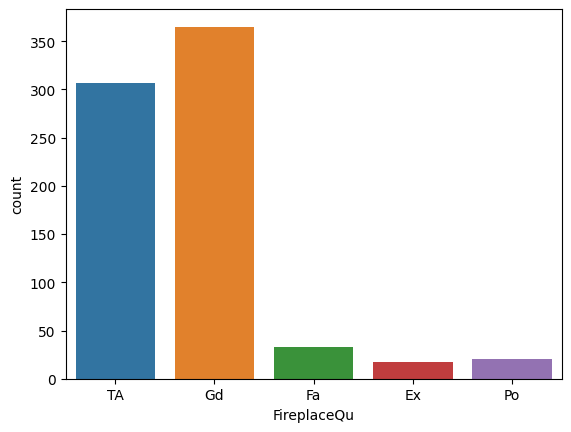

         GarageType  Ratio
Attchd          852 59.497
Detchd          386 26.955
BuiltIn          79  5.517
Basment          19  1.327
CarPort           9  0.628
2Types            6  0.419


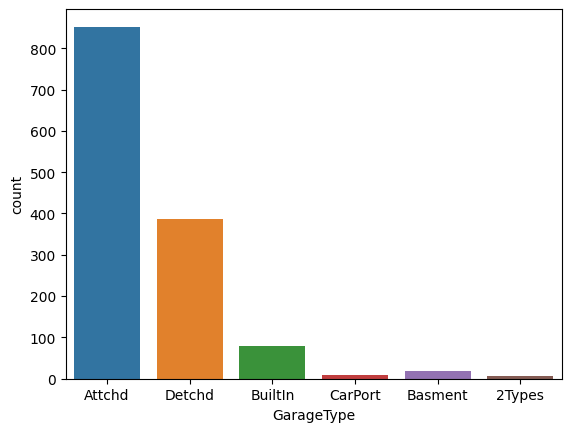

     GarageFinish  Ratio
Unf           604 42.179
RFn           415 28.980
Fin           332 23.184


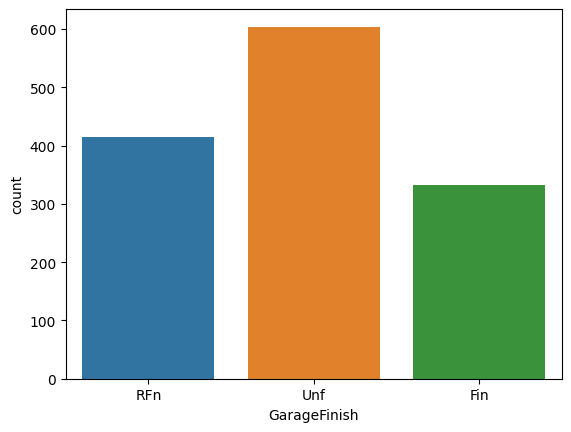

    GarageQual  Ratio
TA        1284 89.665
Fa          48  3.352
Gd          14  0.978
Po           3  0.209
Ex           2  0.140


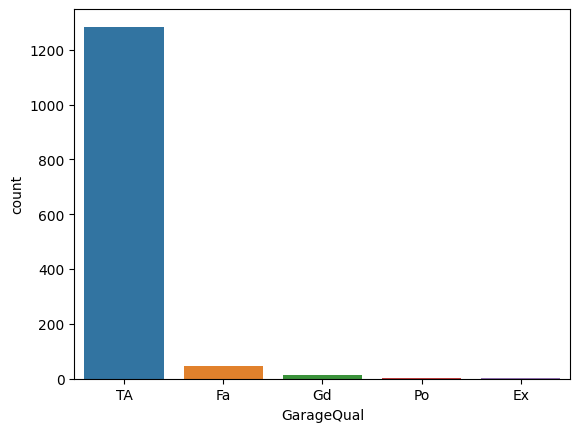

    GarageCond  Ratio
TA        1298 90.642
Fa          35  2.444
Gd           9  0.628
Po           7  0.489
Ex           2  0.140


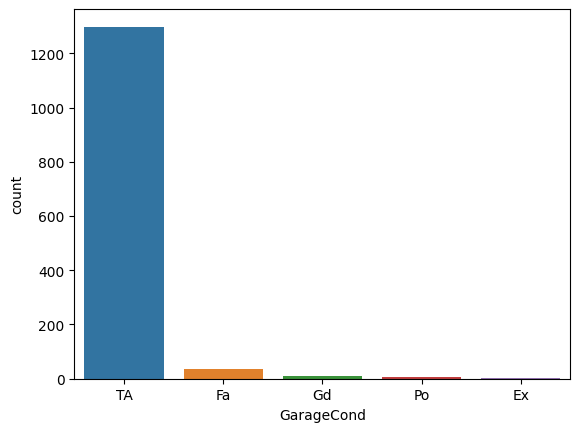

   PavedDrive  Ratio
Y        1312 91.620
N          90  6.285
P          30  2.095


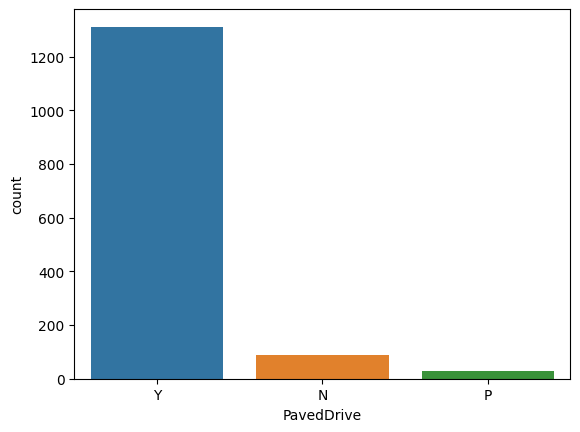

    PoolQC  Ratio
Gd       3  0.209
Fa       2  0.140
Ex       1  0.070


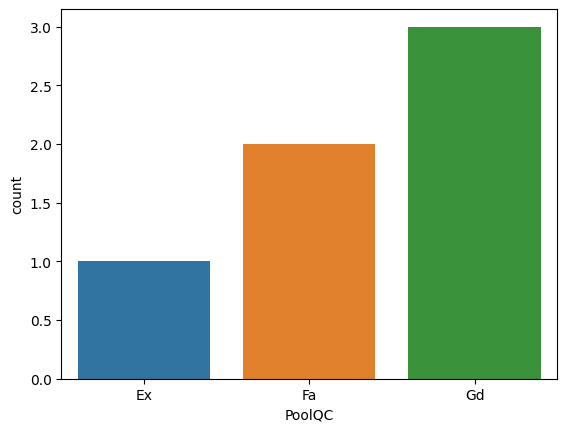

       Fence  Ratio
MnPrv    156 10.894
GdPrv     58  4.050
GdWo      54  3.771
MnWw      11  0.768


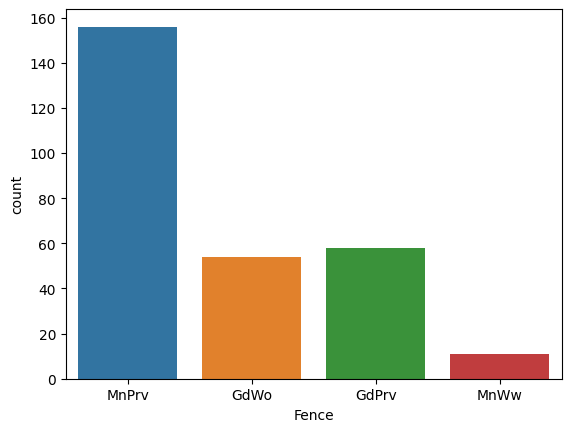

      MiscFeature  Ratio
Shed           49  3.422
Gar2            2  0.140
Othr            2  0.140
TenC            1  0.070


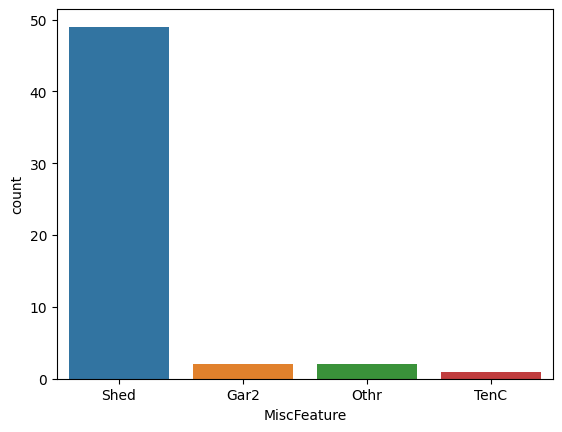

       SaleType  Ratio
WD         1255 87.640
New         107  7.472
COD          43  3.003
ConLD         9  0.628
ConLw         5  0.349
ConLI         4  0.279
CWD           4  0.279
Oth           3  0.209
Con           2  0.140


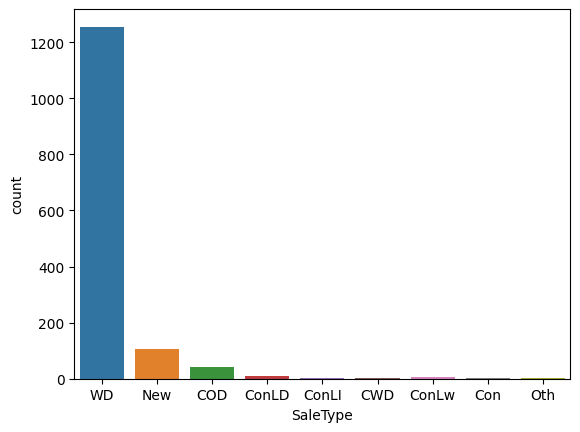

         SaleCondition  Ratio
Normal            1186 82.821
Partial            110  7.682
Abnorml            100  6.983
Family              20  1.397
Alloca              12  0.838
AdjLand              4  0.279


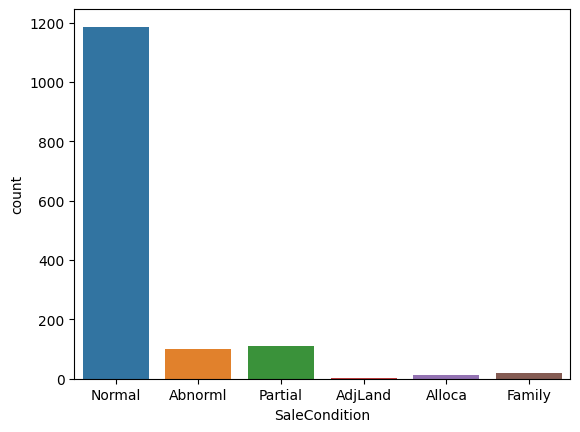

   OverallCond  Ratio
5          796 55.587
6          251 17.528
7          204 14.246
8           72  5.028
4           57  3.980
3           25  1.746
9           21  1.466
2            5  0.349
1            1  0.070


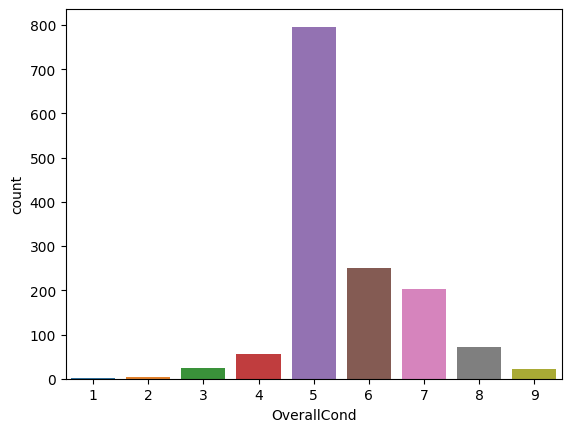

       BsmtFullBath  Ratio
0.000           849 59.288
1.000           567 39.595
2.000            15  1.047
3.000             1  0.070


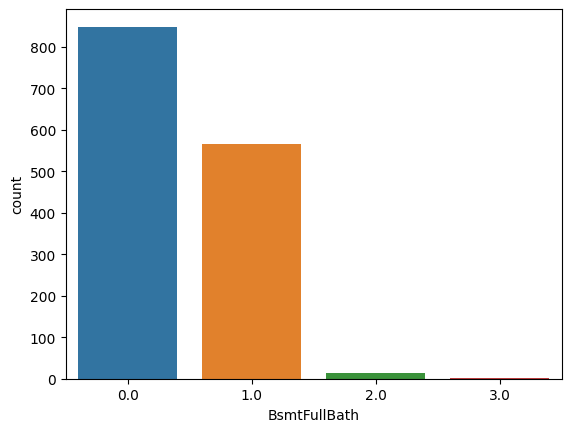

       BsmtHalfBath  Ratio
0.000          1351 94.344
1.000            79  5.517
2.000             2  0.140


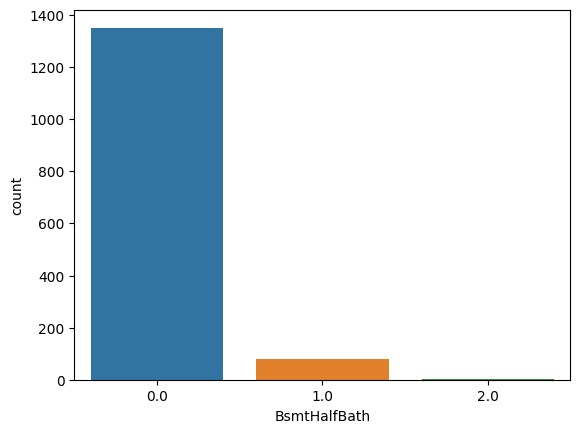

   FullBath  Ratio
2       751 52.444
1       649 45.321
3        23  1.606
0         9  0.628


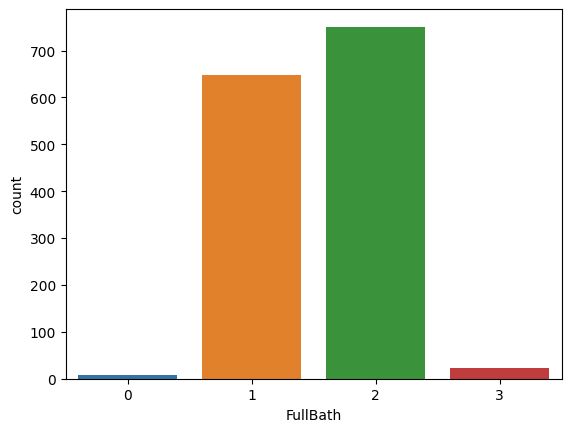

   HalfBath  Ratio
0       908 63.408
1       512 35.754
2        12  0.838


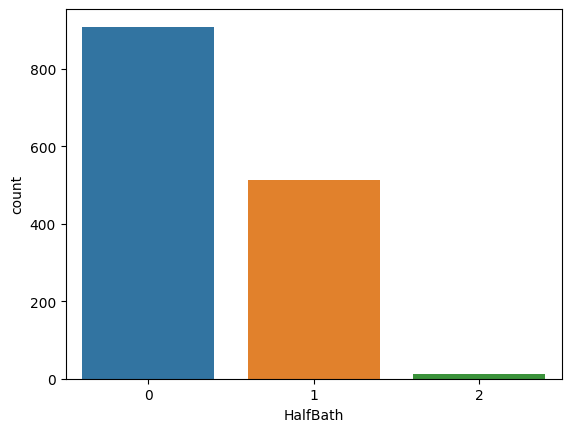

   BedroomAbvGr  Ratio
3           797 55.656
2           353 24.651
4           199 13.897
1            48  3.352
5            21  1.466
6             7  0.489
0             6  0.419
8             1  0.070


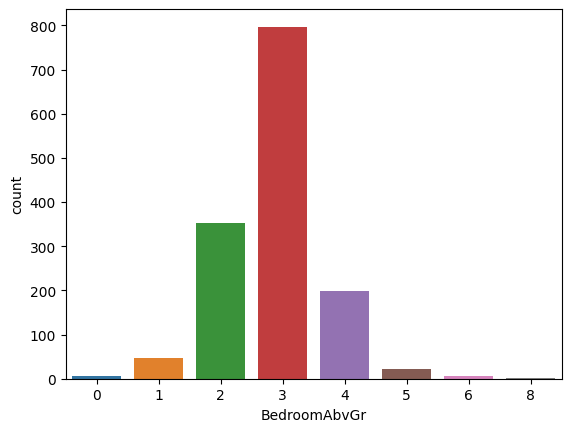

   KitchenAbvGr  Ratio
1          1364 95.251
2            65  4.539
3             2  0.140
0             1  0.070


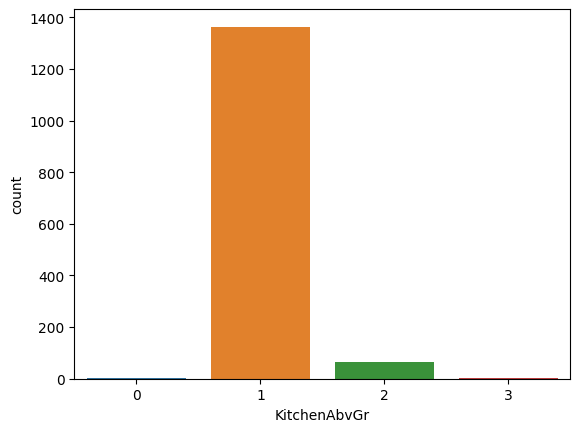

   Fireplaces  Ratio
0         690 48.184
1         631 44.064
2         106  7.402
3           5  0.349


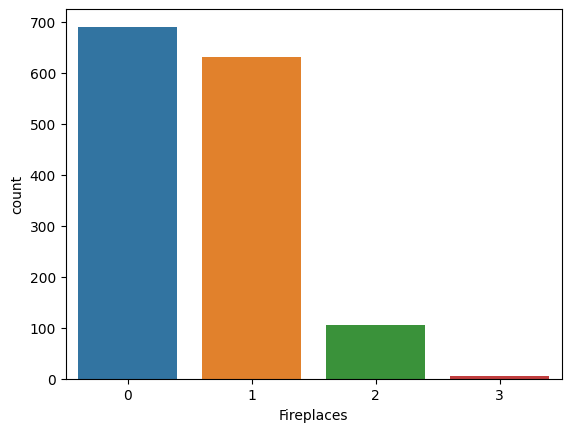

       GarageCars  Ratio
2.000         823 57.472
1.000         369 25.768
3.000         154 10.754
0.000          81  5.656
4.000           5  0.349


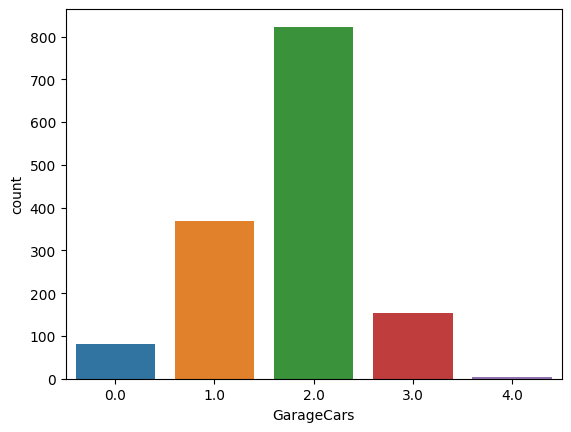

     PoolArea  Ratio
0        1426 99.581
512         1  0.070
648         1  0.070
576         1  0.070
480         1  0.070
519         1  0.070
738         1  0.070


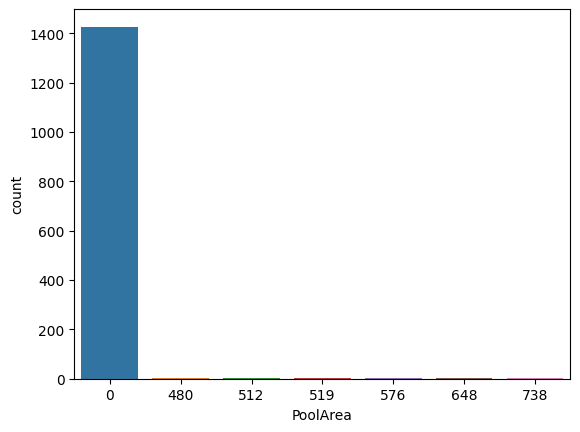

      YrSold  Ratio
2009     330 23.045
2007     322 22.486
2006     307 21.439
2008     301 21.020
2010     172 12.011


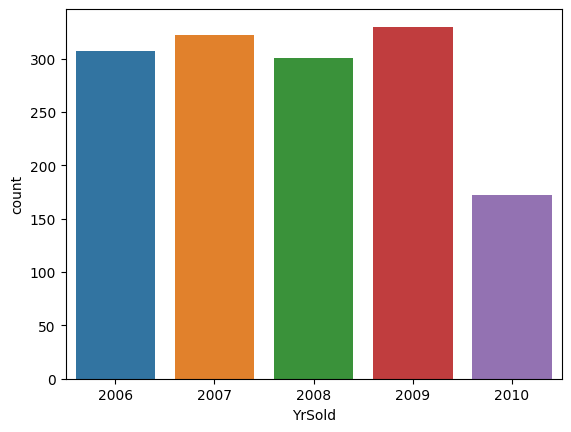

In [23]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()


for col in cat_cols:
    cat_summary(df, col, plot=True)

In [ ]:
# 3. Sayısal Değişken Analizi (Analysis of Numerical Variables)

count   1432.000
mean     731.731
std      422.265
min        1.000
5%        73.550
10%      145.100
20%      293.200
30%      438.300
40%      586.400
50%      733.500
60%      879.600
70%     1023.700
80%     1168.800
90%     1314.900
95%     1388.450
99%     1445.690
max     1460.000
Name: Id, dtype: float64


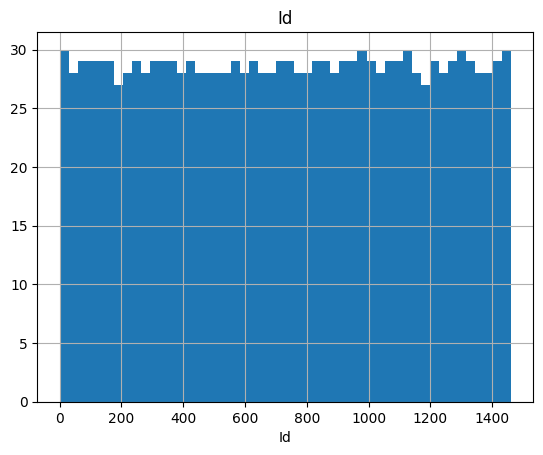

#####################################
count   1432.000
mean      57.112
std       42.596
min       20.000
5%        20.000
10%       20.000
20%       20.000
30%       20.000
40%       30.000
50%       50.000
60%       60.000
70%       60.000
80%       80.000
90%      120.000
95%      160.000
99%      190.000
max      190.000
Name: MSSubClass, dtype: float64


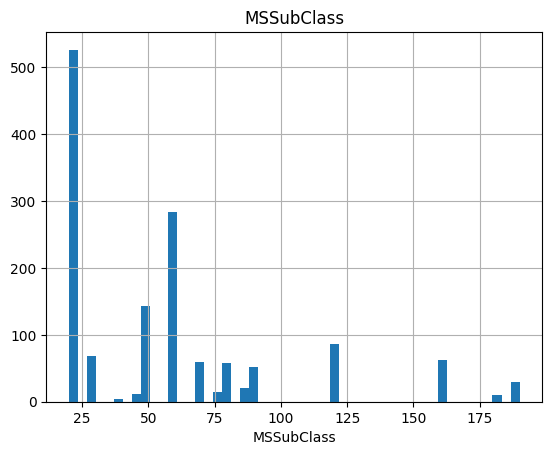

#####################################
count   1175.000
mean      69.557
std       23.891
min       21.000
5%        34.000
10%       43.000
20%       53.000
30%       60.000
40%       63.000
50%       69.000
60%       73.000
70%       78.800
80%       84.200
90%       94.000
95%      105.000
99%      138.520
max      313.000
Name: LotFrontage, dtype: float64


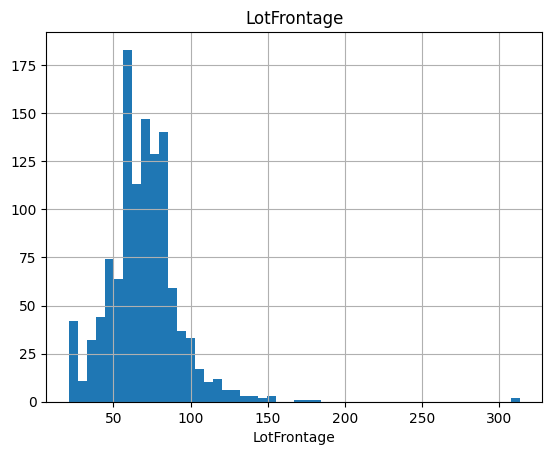

#####################################
count     1432.000
mean     10363.352
std       9917.557
min       1300.000
5%        3230.000
10%       5000.000
20%       7035.600
30%       8000.000
40%       8762.000
50%       9375.000
60%      10137.600
70%      10919.400
80%      12089.000
90%      14142.000
95%      16830.750
99%      34983.270
max     215245.000
Name: LotArea, dtype: float64


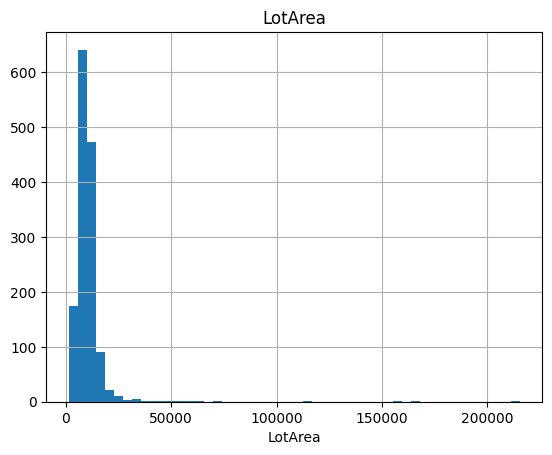

#####################################
count   1432.000
mean       6.041
std        1.325
min        1.000
5%         4.000
10%        5.000
20%        5.000
30%        5.000
40%        6.000
50%        6.000
60%        6.000
70%        7.000
80%        7.000
90%        8.000
95%        8.000
99%        9.000
max       10.000
Name: OverallQual, dtype: float64


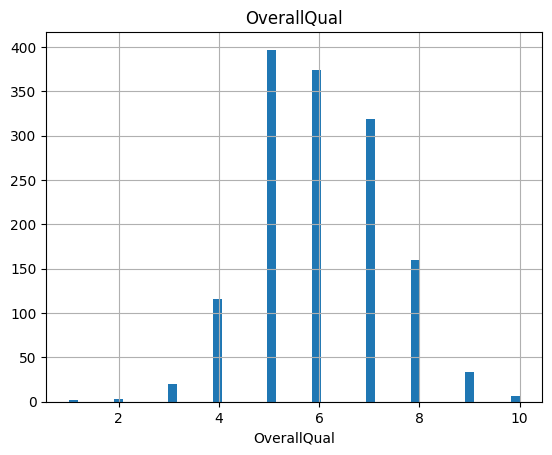

#####################################
count   1432.000
mean    1970.721
std       30.093
min     1872.000
5%      1916.000
10%     1924.000
20%     1947.000
30%     1957.000
40%     1965.000
50%     1972.000
60%     1981.000
70%     1997.000
80%     2003.000
90%     2005.900
95%     2007.000
99%     2009.000
max     2010.000
Name: YearBuilt, dtype: float64


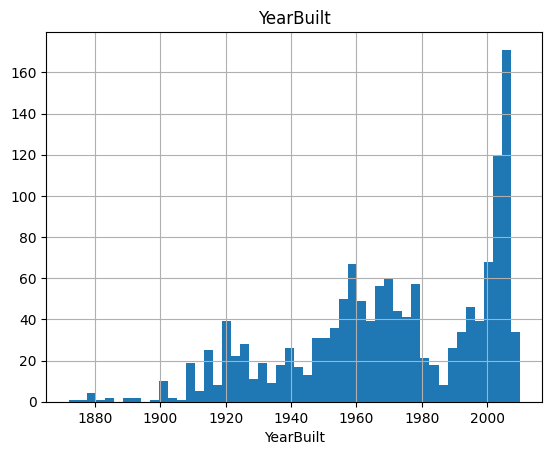

#####################################
count   1432.000
mean    1984.494
std       20.659
min     1950.000
5%      1950.000
10%     1950.000
20%     1961.000
30%     1970.000
40%     1979.000
50%     1993.000
60%     1998.000
70%     2002.000
80%     2005.000
90%     2006.000
95%     2007.000
99%     2009.000
max     2010.000
Name: YearRemodAdd, dtype: float64


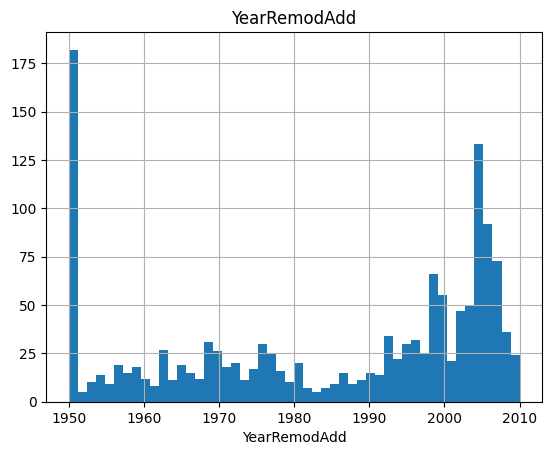

#####################################
count   1425.000
mean      96.206
std      167.329
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%      108.000
80%      194.400
90%      312.000
95%      431.200
99%      754.560
max     1600.000
Name: MasVnrArea, dtype: float64


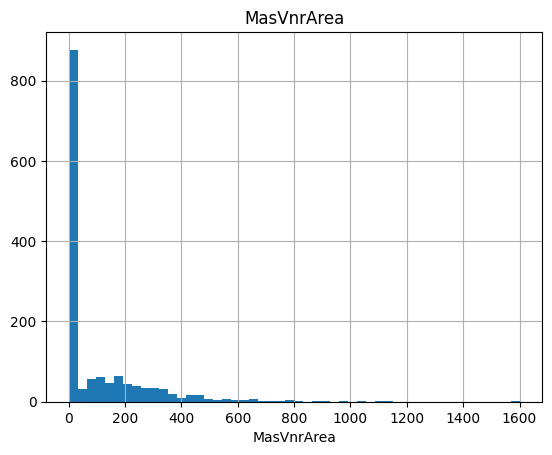

#####################################
count   1432.000
mean     430.492
std      441.542
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%      210.000
50%      377.500
60%      513.000
70%      643.700
80%      784.000
90%     1035.600
95%     1219.000
99%     1516.450
max     5644.000
Name: BsmtFinSF1, dtype: float64


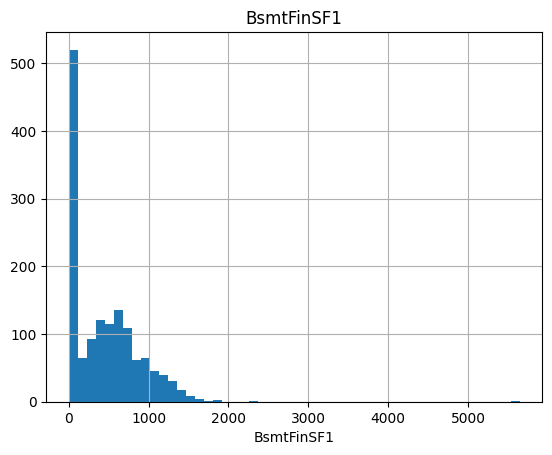

#####################################
count   1432.000
mean      46.957
std      162.209
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%      118.800
95%      397.800
99%      835.420
max     1474.000
Name: BsmtFinSF2, dtype: float64


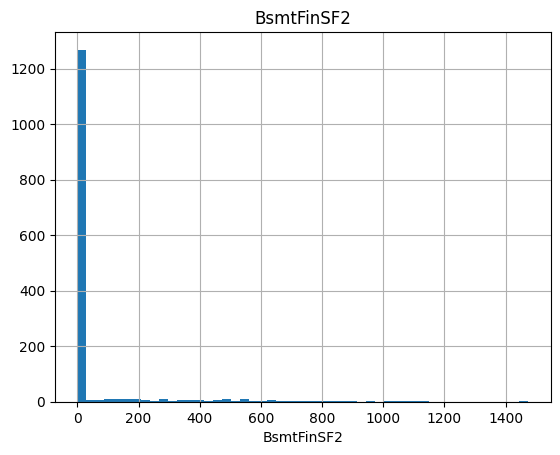

#####################################
count   1432.000
mean     562.119
std      436.354
min        0.000
5%         0.000
10%       70.200
20%      170.200
30%      278.000
40%      372.000
50%      474.000
60%      602.000
70%      732.700
80%      893.800
90%     1211.100
95%     1438.700
99%     1772.140
max     2336.000
Name: BsmtUnfSF, dtype: float64


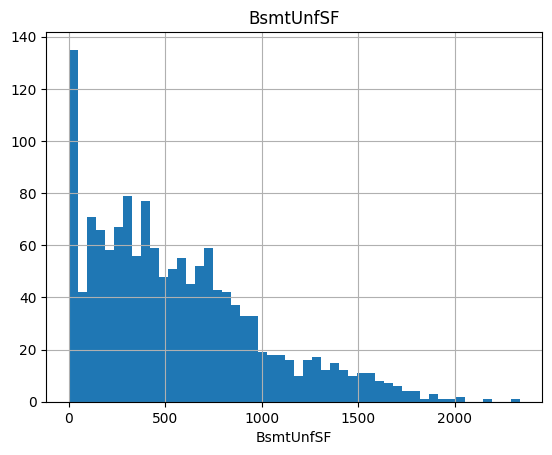

#####################################
count   1432.000
mean    1039.569
std      418.548
min        0.000
5%       505.100
10%      630.000
20%      747.000
30%      832.000
40%      897.600
50%      980.500
60%     1078.000
70%     1200.000
80%     1366.400
90%     1573.000
95%     1711.350
99%     2044.760
max     6110.000
Name: TotalBsmtSF, dtype: float64


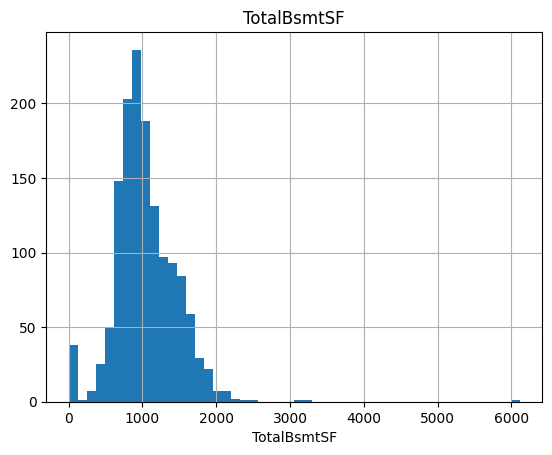

#####################################
count   1432.000
mean    1146.795
std      368.837
min      334.000
5%       672.000
10%      756.000
20%      848.000
30%      912.000
40%      992.400
50%     1078.500
60%     1166.000
70%     1298.000
80%     1458.400
90%     1652.000
95%     1777.350
99%     2125.280
max     4692.000
Name: 1stFlrSF, dtype: float64


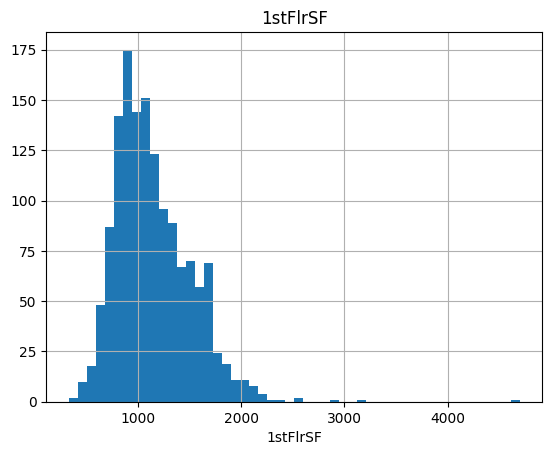

#####################################
count   1432.000
mean     338.078
std      425.401
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%      440.200
70%      667.100
80%      787.800
90%      928.900
95%     1113.800
99%     1348.380
max     1818.000
Name: 2ndFlrSF, dtype: float64


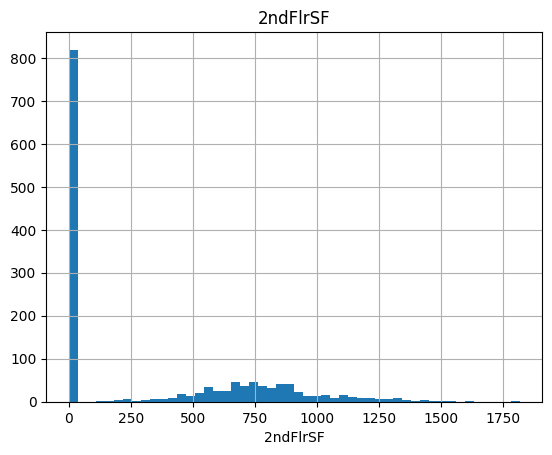

#####################################
count   1432.000
mean       5.559
std       46.752
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
95%        0.000
99%      320.940
max      528.000
Name: LowQualFinSF, dtype: float64


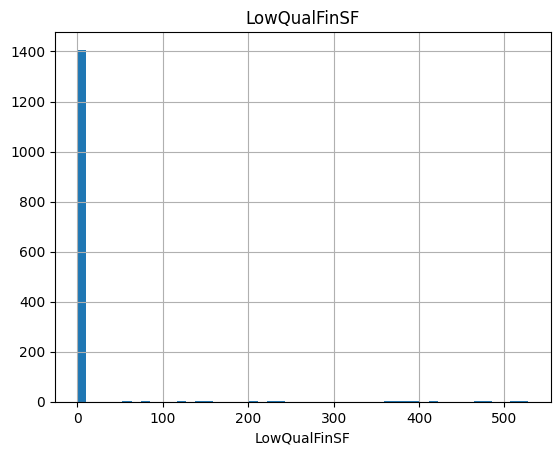

#####################################
count   1432.000
mean    1490.433
std      490.874
min      334.000
5%       848.000
10%      910.200
20%     1057.600
30%     1200.000
40%     1328.000
50%     1454.500
60%     1568.200
70%     1690.700
80%     1839.800
90%     2107.000
95%     2372.900
99%     2804.420
max     5642.000
Name: GrLivArea, dtype: float64


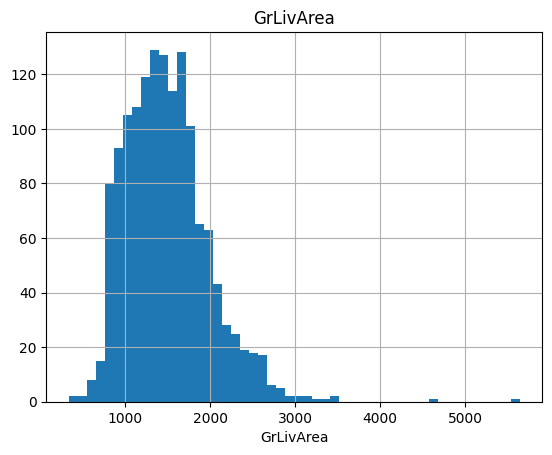

#####################################
count   1432.000
mean       6.455
std        1.566
min        2.000
5%         4.000
10%        5.000
20%        5.000
30%        6.000
40%        6.000
50%        6.000
60%        7.000
70%        7.000
80%        8.000
90%        8.000
95%        9.000
99%       11.000
max       14.000
Name: TotRmsAbvGrd, dtype: float64


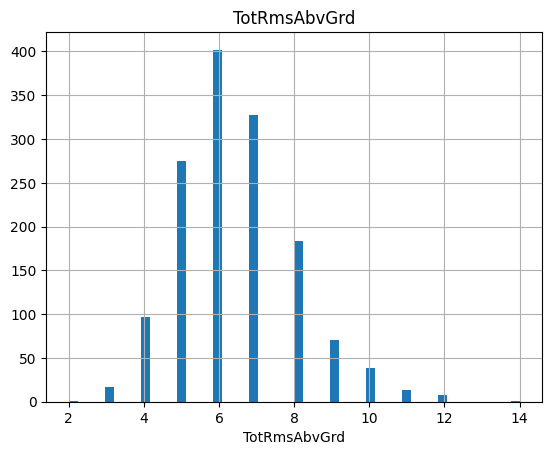

#####################################
count   1351.000
mean    1977.997
std       24.673
min     1900.000
5%      1929.500
10%     1945.000
20%     1957.000
30%     1965.000
40%     1972.000
50%     1979.000
60%     1992.000
70%     1999.000
80%     2003.000
90%     2006.000
95%     2007.000
99%     2009.000
max     2010.000
Name: GarageYrBlt, dtype: float64


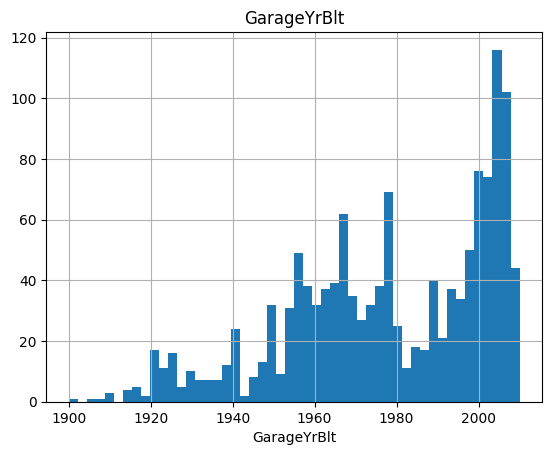

#####################################
count   1432.000
mean     466.112
std      209.215
min        0.000
5%         0.000
10%      240.000
20%      290.400
30%      380.000
40%      436.400
50%      474.000
60%      508.000
70%      550.000
80%      604.800
90%      736.000
95%      840.000
99%      963.660
max     1418.000
Name: GarageArea, dtype: float64


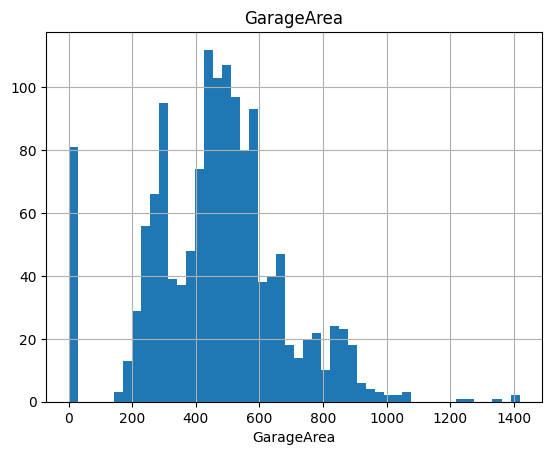

#####################################
count   1432.000
mean      92.202
std      123.915
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%      100.000
70%      144.000
80%      192.000
90%      255.900
95%      326.450
99%      498.450
max      857.000
Name: WoodDeckSF, dtype: float64


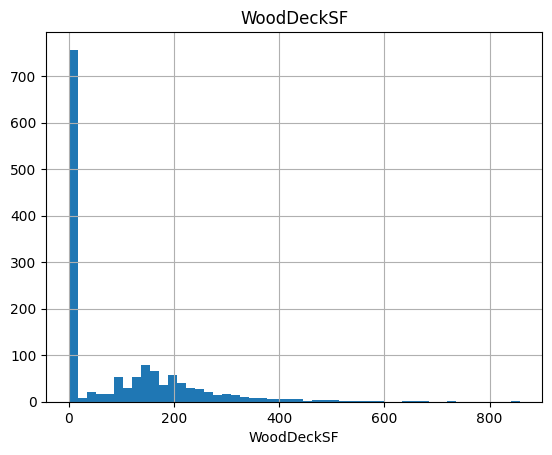

#####################################
count   1432.000
mean      45.543
std       65.568
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%       24.000
60%       39.000
70%       55.000
80%       81.000
90%      128.000
95%      172.000
99%      286.380
max      547.000
Name: OpenPorchSF, dtype: float64


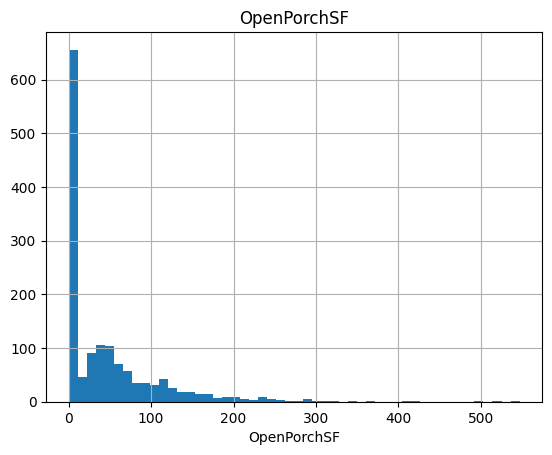

#####################################
count   1432.000
mean      22.013
std       61.048
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%      112.000
95%      180.000
99%      257.450
max      552.000
Name: EnclosedPorch, dtype: float64


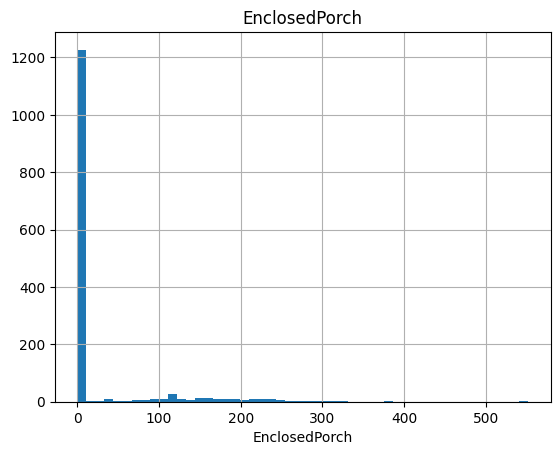

#####################################
count   1432.000
mean       3.476
std       29.599
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
95%        0.000
99%      168.000
max      508.000
Name: 3SsnPorch, dtype: float64


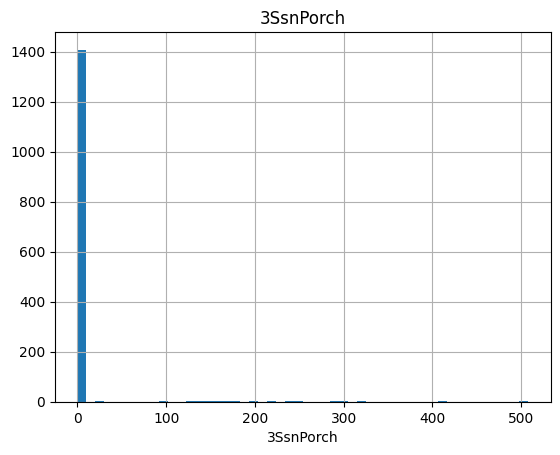

#####################################
count   1432.000
mean      14.571
std       54.593
min        0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
95%      155.450
99%      265.690
max      480.000
Name: ScreenPorch, dtype: float64


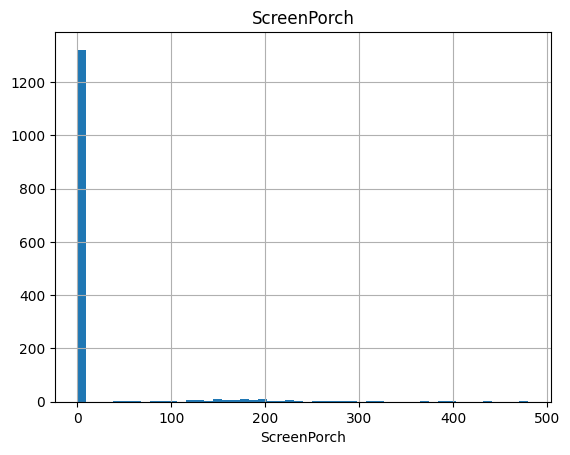

#####################################
count    1432.000
mean       44.339
std       500.916
min         0.000
5%          0.000
10%         0.000
20%         0.000
30%         0.000
40%         0.000
50%         0.000
60%         0.000
70%         0.000
80%         0.000
90%         0.000
95%         0.000
99%       700.000
max     15500.000
Name: MiscVal, dtype: float64


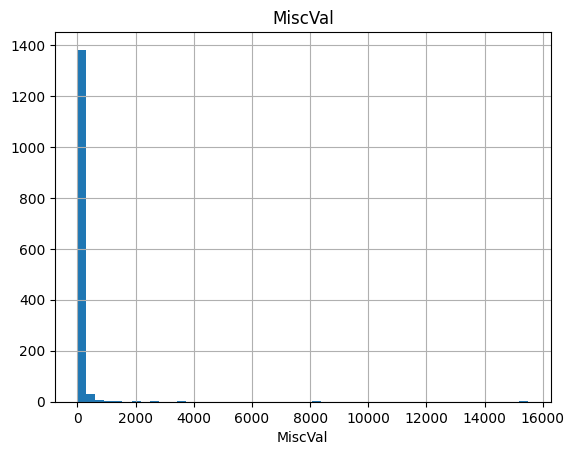

#####################################
count   1432.000
mean       6.335
std        2.704
min        1.000
5%         2.000
10%        3.000
20%        4.000
30%        5.000
40%        6.000
50%        6.000
60%        7.000
70%        7.000
80%        8.000
90%       10.000
95%       11.000
99%       12.000
max       12.000
Name: MoSold, dtype: float64


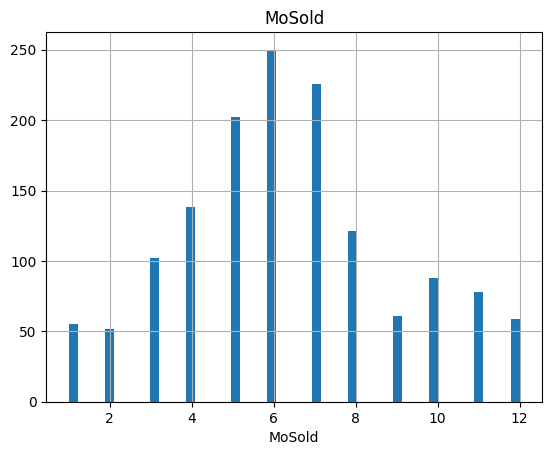

#####################################
count     1432.000
mean    174873.439
std      65922.704
min      34900.000
5%       88000.000
10%     106000.000
20%     123100.000
30%     135000.000
40%     145350.000
50%     160600.000
60%     177500.000
70%     194640.000
80%     225000.000
90%     269350.000
95%     312725.000
99%     376673.940
max     395192.000
Name: SalePrice, dtype: float64


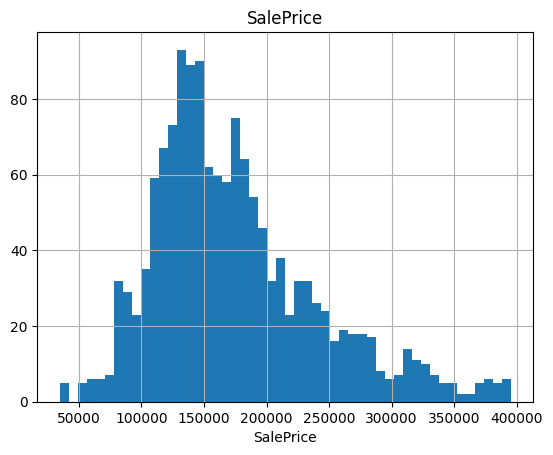

#####################################


In [24]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=50)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

    print("#####################################")


for col in num_cols:
    num_summary(df, col, True)

In [ ]:
# 4. Hedef Değişken Analizi (Analysis of Target Variable)

          TARGET_MEAN
MSZoning             
C (all)     74528.000
FV         214014.062
RH         131558.375
RL         183803.885
RM         124709.995


        TARGET_MEAN
Street             
Grvl     130190.500
Pave     175061.445


       TARGET_MEAN
Alley             
Grvl    122219.080
Pave    168000.585


          TARGET_MEAN
LotShape             
IR1        197376.688
IR2        203406.686
IR3        216036.500
Reg        161762.822


             TARGET_MEAN
LandContour             
Bnk           143104.079
HLS           220831.604
Low           203661.111
Lvl           173907.774


           TARGET_MEAN
Utilities             
AllPub      174899.556
NoSeWa      137500.000


           TARGET_MEAN
LotConfig             
Corner      176211.581
CulDSac     203491.000
FR2         177934.574
FR3         208475.000
Inside      171859.972


           TARGET_MEAN
LandSlope             
Gtl         173809.679
Mod         191401.859
Sev         204379.231


            TARGET_MEAN


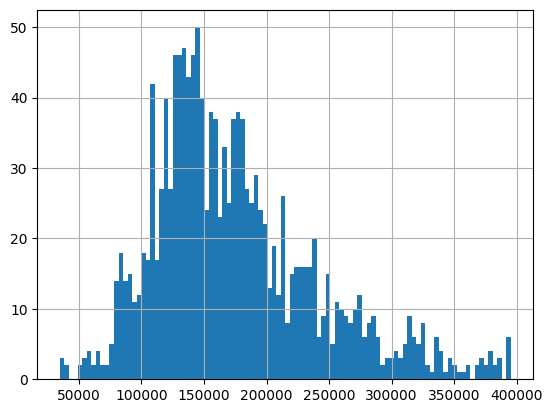

Bağımlı değişkenin logaritmasının incelenmesi


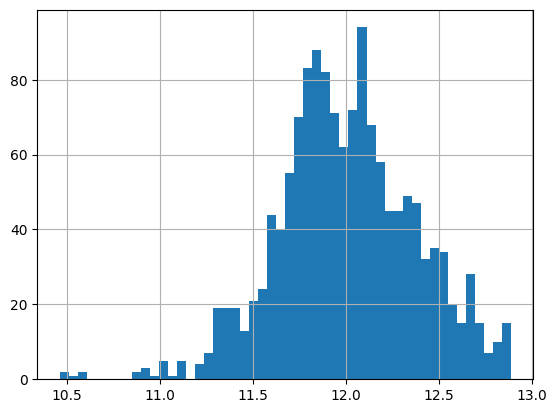

In [26]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

for col in cat_cols:
    target_summary_with_cat(df,"SalePrice",col)

print("Bağımlı değişkenin incelenmesi")
df["SalePrice"].hist(bins=100)
plt.show()

print("Bağımlı değişkenin logaritmasının incelenmesi")
np.log1p(df['SalePrice']).hist(bins=50)
plt.show()

In [ ]:
# 5. Korelasyon Analizi (Analysis of Correlation)

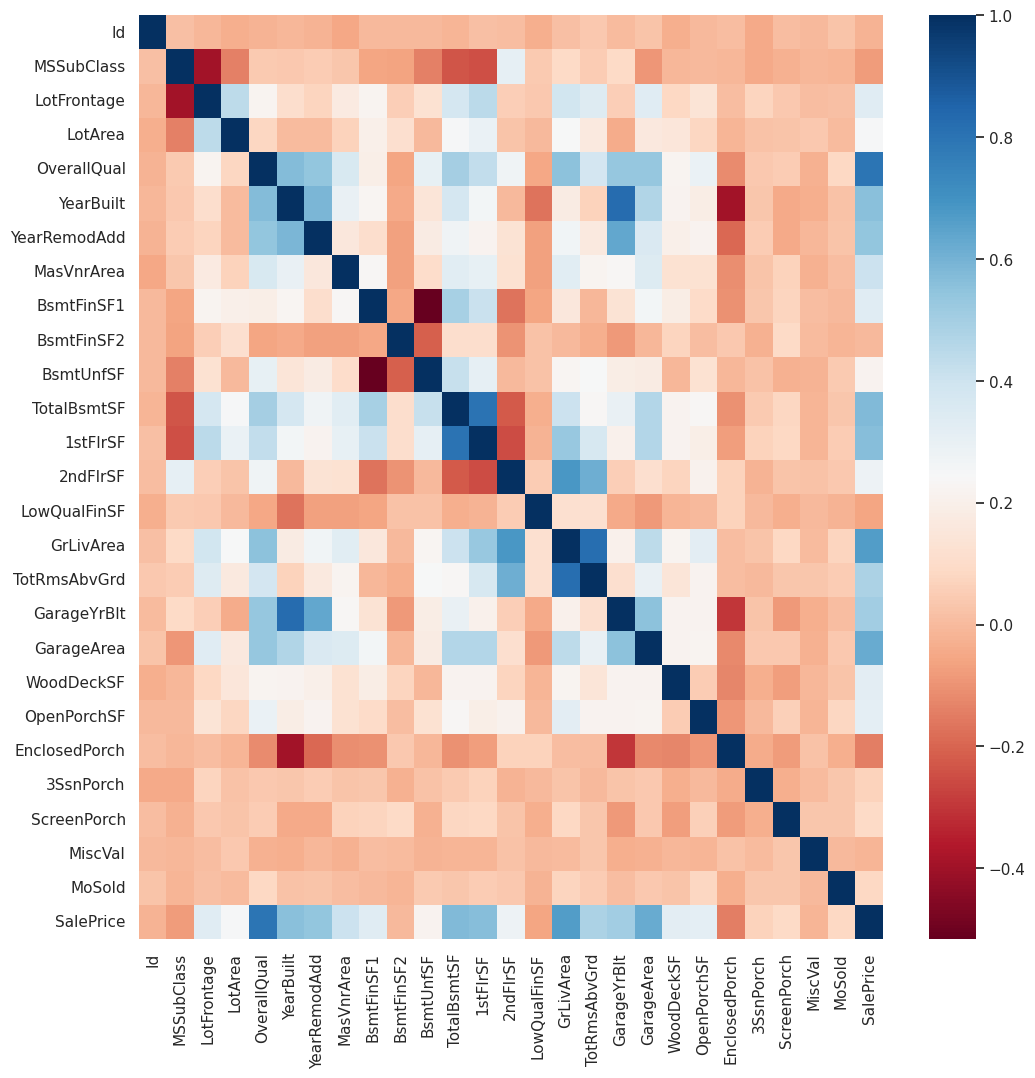

In [27]:
corr = df[num_cols].corr()
corr

# Korelasyonların gösterilmesi
sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(corr, cmap="RdBu")
plt.show()

In [28]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.70):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu")
        plt.show()
    return drop_list

high_correlated_cols(df, plot=False)

<ipython-input-28-8f9f5975cf40>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))


['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'SalePrice']

Görev 2: Veri ön işleme işlemlerini gerçekleştiriniz.

In [ ]:
# Aykırı Değer Analizi

In [29]:
# Aykırı değerlerin baskılanması
def outlier_thresholds(dataframe, variable, low_quantile=0.10, up_quantile=0.90):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

In [30]:
# Aykırı değer kontrolü
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


for col in num_cols:
    if col != "SalePrice":
      print(col, check_outlier(df, col))

Id False
MSSubClass False
LotFrontage True
LotArea True
OverallQual False
YearBuilt False
YearRemodAdd False
MasVnrArea True
BsmtFinSF1 True
BsmtFinSF2 True
BsmtUnfSF False
TotalBsmtSF True
1stFlrSF True
2ndFlrSF False
LowQualFinSF True
GrLivArea True
TotRmsAbvGrd True
GarageYrBlt False
GarageArea False
WoodDeckSF True
OpenPorchSF True
EnclosedPorch True
3SsnPorch True
ScreenPorch True
MiscVal True
MoSold False


In [31]:
# Aykırı değerlerin baskılanması
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


for col in num_cols:
    if col != "SalePrice":
        replace_with_thresholds(df,col)

In [ ]:
# Eksik Değer Analizi

In [32]:
def missing_values_table(dataframe, na_name=False):

    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])

    print(missing_df, end="\n")

    if na_name:
        return na_columns

missing_values_table(df)

              n_miss  ratio
PoolQC          1426 99.580
MiscFeature     1378 96.230
Alley           1341 93.650
Fence           1153 80.520
FireplaceQu      690 48.180
LotFrontage      257 17.950
GarageType        81  5.660
GarageYrBlt       81  5.660
GarageFinish      81  5.660
GarageQual        81  5.660
GarageCond        81  5.660
BsmtExposure      38  2.650
BsmtFinType2      38  2.650
BsmtFinType1      37  2.580
BsmtCond          37  2.580
BsmtQual          37  2.580
MasVnrArea         7  0.490
MasVnrType         7  0.490
Electrical         1  0.070


In [33]:
df["Alley"].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [34]:
df["BsmtQual"].value_counts()

TA    648
Gd    613
Ex     99
Fa     35
Name: BsmtQual, dtype: int64

In [35]:
# Bazı değişkenlerdeki boş değerler evin o özelliğe sahip olmadığını ifade etmektedir

no_cols = ["Alley","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu",
           "GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]

# Kolonlardaki boşlukların "No" ifadesi ile doldurulması

for col in no_cols:
    df[col].fillna("No",inplace=True)

missing_values_table(df)

             n_miss  ratio
LotFrontage     257 17.950
GarageYrBlt      81  5.660
MasVnrType        7  0.490
MasVnrArea        7  0.490
Electrical        1  0.070


In [36]:
# Bu fonsksiyon eksik değerlerin median veya mean ile doldurulmasını sağlar.(Aykırı değerlerden az etkilenmesi için median ile doldurdum.)

def quick_missing_imp(data, num_method="median", cat_length=20, target="SalePrice"):
    variables_with_na = [col for col in data.columns if data[col].isnull().sum() > 0]  # Eksik değere sahip olan değişkenler listelenir

    temp_target = data[target]

    print("# BEFORE")
    print(data[variables_with_na].isnull().sum(), "\n\n")  # Uygulama öncesi değişkenlerin eksik değerlerinin sayısı

    # değişken object ve sınıf sayısı cat_lengthe eşit veya altındaysa boş değerleri mode ile doldur
    data = data.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= cat_length) else x, axis=0)

    # num_method mean ise tipi object olmayan değişkenlerin boş değerleri ortalama ile dolduruluyor
    if num_method == "mean":
        data = data.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)
    # num_method median ise tipi object olmayan değişkenlerin boş değerleri ortalama ile dolduruluyor
    elif num_method == "median":
        data = data.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)

    data[target] = temp_target

    print("# AFTER \n Imputation method is 'MODE' for categorical variables!")
    print(" Imputation method is '" + num_method.upper() + "' for numeric variables! \n")
    print(data[variables_with_na].isnull().sum(), "\n\n")

    return data


df = quick_missing_imp(df, num_method="median", cat_length=17)

# BEFORE
LotFrontage    257
MasVnrType       7
MasVnrArea       7
Electrical       1
GarageYrBlt     81
dtype: int64 


# AFTER 
 Imputation method is 'MODE' for categorical variables!
 Imputation method is 'MEDIAN' for numeric variables! 

LotFrontage    0
MasVnrType     0
MasVnrArea     0
Electrical     0
GarageYrBlt    0
dtype: int64 




In [ ]:
# Rare Analizi

In [ ]:
# NOT: Rare analizin amacı düşük etkiye sahip gözlemlerin etkisini arttırmak.

In [37]:
# Kategorik kolonların dağılımının incelenmesi

def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

rare_analyser(df, "SalePrice", cat_cols)

MSZoning : 5
         COUNT  RATIO  TARGET_MEAN
C (all)     10  0.007    74528.000
FV          65  0.045   214014.062
RH          16  0.011   131558.375
RL        1124  0.785   183803.885
RM         217  0.152   124709.995


Street : 2
      COUNT  RATIO  TARGET_MEAN
Grvl      6  0.004   130190.500
Pave   1426  0.996   175061.445


Alley : 3
      COUNT  RATIO  TARGET_MEAN
Grvl     50  0.035   122219.080
No     1341  0.936   177046.820
Pave     41  0.029   168000.585


LotShape : 4
     COUNT  RATIO  TARGET_MEAN
IR1    471  0.329   197376.688
IR2     35  0.024   203406.686
IR3     10  0.007   216036.500
Reg    916  0.640   161762.822


LandContour : 4
     COUNT  RATIO  TARGET_MEAN
Bnk     63  0.044   143104.079
HLS     48  0.034   220831.604
Low     36  0.025   203661.111
Lvl   1285  0.897   173907.774


Utilities : 2
        COUNT  RATIO  TARGET_MEAN
AllPub   1431  0.999   174899.556
NoSeWa      1  0.001   137500.000


LotConfig : 5
         COUNT  RATIO  TARGET_MEAN
Corner     260  

In [39]:
# Sınıfların oranlarına göre diğer sınıflara dahil edilmesi

#ExterCond : 5
#    COUNT  RATIO  TARGET_MEAN
#Ex      3  0.002   201333.333
#Fa     28  0.020   102595.143
#Gd    144  0.101   163604.479
#Po      1  0.001    76500.000
#TA   1256  0.877   177791.843

df["ExterCond"] = np.where(df.ExterCond.isin(["Fa", "Po"]), "FaPo", df["ExterCond"])
df["ExterCond"] = np.where(df.ExterCond.isin(["Ex", "Gd"]), "Ex", df["ExterCond"])

In [40]:
#LotShape : 4
#     COUNT  RATIO  TARGET_MEAN
#IR1    471  0.329   197376.688
#IR2     35  0.024   203406.686
#IR3     10  0.007   216036.500
#Reg    916  0.640   161762.822

df["LotShape"] = np.where(df.LotShape.isin(["IR1", "IR2", "IR3"]), "IR", df["LotShape"])

In [41]:
#GarageQual : 6
#    COUNT  RATIO  TARGET_MEAN
#Ex      2  0.001   124000.000
#Fa     48  0.034   123573.354
#Gd     14  0.010   215860.714
#No     81  0.057   103317.284
#Po      3  0.002   100166.667
#TA   1284  0.897   181112.144

df["GarageQual"] = np.where(df.GarageQual.isin(["Fa", "Po"]), "FaPo", df["GarageQual"])
df["GarageQual"] = np.where(df.GarageQual.isin(["Ex", "Gd", "TA"]), "ExGd", df["GarageQual"])

In [43]:
#BsmtFinType2 : 7
#     COUNT  RATIO  TARGET_MEAN
#ALQ     18  0.013   190772.222
#BLQ     33  0.023   151101.000
#GLQ     14  0.010   180982.143
#LwQ     46  0.032   164364.130
#No      38  0.027   110346.237
#Rec     53  0.037   160443.868
#Unf   1230  0.859   178217.357

df["BsmtFinType2"] = np.where(df.BsmtFinType2.isin(["GLQ", "ALQ"]), "RareExcellent", df["BsmtFinType2"])
df["BsmtFinType2"] = np.where(df.BsmtFinType2.isin(["BLQ", "LwQ", "Rec"]), "RareGood", df["BsmtFinType2"])

In [44]:
# Nadir sınıfların tespit edilmesi

def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])

    return temp_df


rare_encoder(df,0.01)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.000,60,RL,65.000,8450.000,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.000,5,2003.000,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706.000,Unf,0.000,150.000,856.000,GasA,Ex,Y,SBrkr,856,854.000,0,1710.000,1.000,0.000,2,1,3,1,Gd,8.000,Typ,0,No,Attchd,2003.000,RFn,2.000,548.000,ExGd,TA,Y,0.000,61,0,0,0,0,No,No,No,0,2.000,2008,WD,Normal,208500.000
1,2.000,20,RL,80.000,9600.000,Pave,No,Reg,Lvl,AllPub,FR2,Gtl,Rare,Feedr,Norm,1Fam,1Story,6.000,8,1976.000,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.000,Unf,0.000,284.000,1262.000,GasA,Ex,Y,SBrkr,1262,0.000,0,1262.000,0.000,1.000,2,0,3,1,TA,6.000,Typ,1,TA,Attchd,1976.000,RFn,2.000,460.000,ExGd,TA,Y,298.000,0,0,0,0,0,No,No,No,0,5.000,2007,WD,Normal,181500.000
2,3.000,60,RL,68.000,11250.000,Pave,No,IR,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.000,5,2001.000,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.000,Unf,0.000,434.000,920.000,GasA,Ex,Y,SBrkr,920,866.000,0,1786.000,1.000,0.000,2,1,3,1,Gd,6.000,Typ,1,TA,Attchd,2001.000,RFn,2.000,608.000,ExGd,TA,Y,0.000,42,0,0,0,0,No,No,No,0,9.000,2008,WD,Normal,223500.000
3,4.000,70,RL,60.000,9550.000,Pave,No,IR,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7.000,5,1915.000,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216.000,Unf,0.000,540.000,756.000,GasA,Gd,Y,SBrkr,961,756.000,0,1717.000,1.000,0.000,1,0,3,1,Gd,7.000,Typ,1,Gd,Detchd,1998.000,Unf,3.000,642.000,ExGd,TA,Y,0.000,35,272,0,0,0,No,No,No,0,2.000,2006,WD,Abnorml,140000.000
4,5.000,60,RL,84.000,14260.000,Pave,No,IR,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8.000,5,2000.000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655.000,Unf,0.000,490.000,1145.000,GasA,Ex,Y,SBrkr,1145,1053.000,0,2198.000,1.000,0.000,2,1,4,1,Gd,9.000,Typ,1,TA,Attchd,2000.000,RFn,3.000,836.000,ExGd,TA,Y,192.000,84,0,0,0,0,No,No,No,0,12.000,2008,WD,Normal,250000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.000,60,RL,62.000,7917.000,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6.000,5,1999.000,2000,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,PConc,Gd,TA,No,Unf,0.000,Unf,0.000,953.000,953.000,GasA,Ex,Y,SBrkr,953,694.000,0,1647.000,0.000,0.000,2,1,3,1,TA,7.000,Typ,1,TA,Attchd,1999.000,RFn,2.000,460.000,ExGd,TA,Y,0.000,40,0,0,0,0,No,No,No,0,8.000,2007,WD,Normal,175000.000
1456,1457.000,20,RL,85.000,13175.000,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6.000,6,1978.000,1988,Gable,CompShg,Plywood,Plywood,Stone,119.000,TA,TA,CBlock,Gd,TA,No,ALQ,790.000,RareGood,163.000,589.000,1542.000,GasA,TA,Y,SBrkr,2073,0.000,0,2073.000,1.000,0.000,2,0,3,1,TA,7.000,Min1,2,TA,Attchd,1978.000,Unf,2.000,500.000,ExGd,TA,Y,349.000,0,0,0,0,0,No,MnPrv,No,0,2.000,2010,WD,Normal,2100

GÖREV 3: Yeni değişkenler oluşturunuz ve oluşturduğunuz yeni değişkenlerin başına 'NEW' ekleyiniz.

In [ ]:
# NOT: Regresyonda kategorik değişken üretmek başarıyı düşürür. Numerik üzerinden ilerlemek başarıyı arttıracaktır.

In [45]:
df["NEW_1st*GrLiv"] = (df["1stFlrSF"]*df["GrLivArea"])

df["NEW_Garage*GrLiv"] = (df["GarageArea"]*df["GrLivArea"])

df["TotalQual"] = df[["OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtCond", "BsmtFinType1",
                      "BsmtFinType2", "HeatingQC", "KitchenQual", "Functional", "FireplaceQu", "GarageQual", "GarageCond", "Fence"]].sum(axis = 1)

df["TotalGarageQual"] = df[["GarageQual", "GarageCond"]].sum(axis = 1)

df["Overall"] = df[["OverallQual", "OverallCond"]].sum(axis = 1)

df["Exter"] = df[["ExterQual", "ExterCond"]].sum(axis = 1)

df["Qual"] = df[["OverallQual", "ExterQual", "GarageQual", "Fence", "BsmtFinType1", "BsmtFinType2", "KitchenQual", "FireplaceQu"]].sum(axis = 1)

df["Cond"] = df[["OverallCond", "ExterCond", "GarageCond", "BsmtCond", "HeatingQC", "Functional"]].sum(axis = 1)

# Total Floor
df["NEW_TotalFlrSF"] = df["1stFlrSF"] + df["2ndFlrSF"]

# Total Finished Basement Area
df["NEW_TotalBsmtFin"] = df.BsmtFinSF1 + df.BsmtFinSF2

# Porch Area
df["NEW_PorchArea"] = df.OpenPorchSF + df.EnclosedPorch + df.ScreenPorch + df["3SsnPorch"] + df.WoodDeckSF

# Total House Area
df["NEW_TotalHouseArea"] = df.NEW_TotalFlrSF + df.TotalBsmtSF

df["NEW_TotalSqFeet"] = df.GrLivArea + df.TotalBsmtSF

df["NEW_TotalFullBath"] = df.BsmtFullBath + df.FullBath
df["NEW_TotalHalfBath"] = df.BsmtHalfBath + df.HalfBath

df["NEW_TotalBath"] = df["NEW_TotalFullBath"] + (df["NEW_TotalHalfBath"]*0.5)

# Lot Ratio
df["NEW_LotRatio"] = df.GrLivArea / df.LotArea

df["NEW_RatioArea"] = df.NEW_TotalHouseArea / df.LotArea

df["NEW_GarageLotRatio"] = df.GarageArea / df.LotArea

# MasVnrArea
df["NEW_MasVnrRatio"] = df.MasVnrArea / df.NEW_TotalHouseArea

# Dif Area
df["NEW_DifArea"] = (df.LotArea - df["1stFlrSF"] - df.GarageArea - df.NEW_PorchArea - df.WoodDeckSF)

# LowQualFinSF
df["NEW_LowQualFinSFRatio"] = df.LowQualFinSF / df.NEW_TotalHouseArea

df["NEW_OverallGrade"] = df["OverallQual"] * df["OverallCond"]

# Overall kitchen score
df["NEW_KitchenScore"] = df["KitchenAbvGr"] * df["KitchenQual"]
# Overall fireplace score
df["NEW_FireplaceScore"] = df["Fireplaces"] * df["FireplaceQu"]


df["NEW_Restoration"] = df.YearRemodAdd - df.YearBuilt

df["NEW_HouseAge"] = df.YrSold - df.YearBuilt

df["NEW_RestorationAge"] = df.YrSold - df.YearRemodAdd

df["NEW_GarageAge"] = df.GarageYrBlt - df.YearBuilt

df["NEW_GarageRestorationAge"] = np.abs(df.GarageYrBlt - df.YearRemodAdd)

df["NEW_GarageSold"] = df.YrSold - df.GarageYrBlt

In [46]:
drop_list = ["Street", "Alley", "LandContour", "Utilities", "LandSlope","Heating", "PoolQC", "MiscFeature","Neighborhood"]

# drop_list'teki değişkenlerin düşürülmesi

df.drop(drop_list, axis=1, inplace=True)

In [47]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,NEW_1st*GrLiv,NEW_Garage*GrLiv,TotalQual,TotalGarageQual,Overall,Exter,Qual,Cond,NEW_TotalFlrSF,NEW_TotalBsmtFin,NEW_PorchArea,NEW_TotalHouseArea,NEW_TotalSqFeet,NEW_TotalFullBath,NEW_TotalHalfBath,NEW_TotalBath,NEW_LotRatio,NEW_RatioArea,NEW_GarageLotRatio,NEW_MasVnrRatio,NEW_DifArea,NEW_LowQualFinSFRatio,NEW_OverallGrade,NEW_KitchenScore,NEW_FireplaceScore,NEW_Restoration,NEW_HouseAge,NEW_RestorationAge,NEW_GarageAge,NEW_GarageRestorationAge,NEW_GarageSold
0,1.000,60,RL,65.000,8450.000,Reg,Inside,Norm,Norm,1Fam,2Story,7.000,5,2003.000,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706.000,Unf,0.000,150.000,856.000,Ex,Y,SBrkr,856,854.000,0,1710.000,1.000,0.000,2,1,3,1,Gd,8.000,Typ,0,No,Attchd,2003.000,RFn,2.000,548.000,ExGd,TA,Y,0.000,61,0,0,0,0,No,0,2.000,2008,WD,Normal,208500.000,1463760.000,937080.000,12.000,ExGdTA,12.000,GdTA,7.000,5,1710.000,706.000,61.000,2566.000,2566.000,3.000,1.000,3.500,0.202,0.304,0.065,0.076,6985.000,0.000,35.000,Gd,,0.000,5.000,5,0.000,0.000,5.000
1,2.000,20,RL,80.000,9600.000,Reg,FR2,Feedr,Norm,1Fam,1Story,6.000,8,1976.000,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.000,Unf,0.000,284.000,1262.000,Ex,Y,SBrkr,1262,0.000,0,1262.000,0.000,1.000,2,0,3,1,TA,6.000,Typ,1,TA,Attchd,1976.000,RFn,2.000,460.000,ExGd,TA,Y,298.000,0,0,0,0,0,No,0,5.000,2007,WD,Normal,181500.000,1592644.000,580520.000,14.000,ExGdTA,14.000,TATA,6.000,8,1262.000,978.000,298.000,2524.000,2524.000,2.000,1.000,2.500,0.131,0.263,0.048,0.000,7282.000,0.000,48.000,TA,TA,0.000,31.000,31,0.000,0.000,31.000
2,3.000,60,RL,68.000,11250.000,IR,Inside,Norm,Norm,1Fam,2Story,7.000,5,2001.000,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.000,Unf,0.000,434.000,920.000,Ex,Y,SBrkr,920,866.000,0,1786.000,1.000,0.000,2,1,3,1,Gd,6.000,Typ,1,TA,Attchd,2001.000,RFn,2.000,608.000,ExGd,TA,Y,0.000,42,0,0,0,0,No,0,9.000,2008,WD,Normal,223500.000,1643120.000,1085888.000,12.000,ExGdTA,12.000,GdTA,7.000,5,1786.000,486.000,42.000,2706.000,2706.000,3.000,1.000,3.500,0.159,0.241,0.054,0.060,9680.000,0.000,35.000,Gd,TA,1.000,7.000,6,0.000,1.000,7.000
3,4.000,70,RL,60.000,9550.000,IR,Corner,Norm,Norm,1Fam,2Story,7.000,5,1915.000,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216.000,Unf,0.000,540.000,756.000,Gd,Y,SBrkr,961,756.000,0,1717.000,1.000,0.000,1,0,3,1,Gd,7.000,Typ,1,Gd,Detchd,1998.000,Unf,3.000,642.000,ExGd,TA,Y,0.000,35,272,0,0,0,No,0,2.000,2006,WD,Abnorml,140000.000,1650037.000,1102314.000,12.000,ExGdTA,12.000,TATA,7.000,5,1717.000,216.000,307.000,2473.000,2473.000,2.000,0.000,2.000,0.180,0.259,0.067,0.000,7640.000,0.000,35.000,Gd,Gd,55.000,91.000,36,83.000,28.000,8.000
4,5.000,60,RL,84.000,14260.000,IR,FR2,Norm,Norm,1Fam,2Story,8.000,5,2000.000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655.000,Unf,0.000,490.000,1145.000,Ex,Y,SBrkr,1145,1053.000,0,2198.000,1.000,0.000,2,1,4,1,Gd,9.000,Typ,1,TA,Attchd,2000.000,RFn,3.000,836.000,ExGd,TA,Y,192.000,84,0,0,0,0,No,0,12.000,2008,WD,Normal,250000.000,2516710.000,1837528.000,13.000,ExGdTA,13.000,GdTA,8.000,5,2198.000,655.000,276.000,3343.000,3343.000,3.000,1.000,3.500,0.154,0.234,0.059,0.105,11811.000,0.0

GÖREV 4: Label Encoding & One-Hot Encoding işlemlerinin uygulanması

In [48]:
# Label Encoding

cat_cols, cat_but_car, num_cols = grab_col_names(df)

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df.columns if df[col].dtypes == "O" and len(df[col].unique()) == 2]

for col in binary_cols:
    label_encoder(df, col)

Observations: 1432
Variables: 103
cat_cols: 57
num_cols: 46
cat_but_car: 0
num_but_cat: 19


In [49]:
# One-Hot Encoding

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, cat_cols, drop_first=True)

In [50]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,SalePrice,NEW_1st*GrLiv,NEW_Garage*GrLiv,TotalQual,Overall,Qual,NEW_TotalFlrSF,NEW_TotalBsmtFin,NEW_PorchArea,NEW_TotalHouseArea,NEW_TotalSqFeet,NEW_TotalBath,NEW_LotRatio,NEW_RatioArea,NEW_GarageLotRatio,NEW_MasVnrRatio,NEW_DifArea,NEW_OverallGrade,NEW_Restoration,NEW_HouseAge,NEW_RestorationAge,NEW_GarageAge,NEW_GarageRestorationAge,NEW_GarageSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_1,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_FaPo,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_RareExcellent,BsmtFinType2_RareGood,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_1,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,GarageFinish_No,GarageFinish_RFn,GarageFinish_Unf,GarageQual_FaPo,GarageQual_No,GarageCond_Fa,GarageCond_Gd,GarageCond_No,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,TotalGarageQual_ExGdFa,TotalGarageQual_ExGdGd,TotalGarageQual_ExGdTA,TotalGarageQual_FaPoFa,TotalGarageQual_FaPoPo,TotalGarageQual_FaPoTA,TotalGarageQual_NoNo,Exter_ExTA,Exter_FaFaPo,Exter_FaTA,Exter_GdEx,Exter_GdTA,Exter_TAEx,Exter_TAFaPo,Exter_TATA,NEW_KitchenScore_Ex,NEW_KitchenScore_Fa,NEW_KitchenScore_FaFa,NEW_KitchenScore_Gd,NEW_KitchenScore_GdGd,NEW_KitchenScore_TA,NEW_KitchenScore_TATA,NEW_KitchenScore_TATATA,NEW_FireplaceScore_Ex,NEW_FireplaceScore_ExEx,NEW_FireplaceScore_ExExEx,NEW_FireplaceScore_Fa,NEW_FireplaceScore_FaFa,NEW_FireplaceScore_FaFaFa,NEW_FireplaceScore_Gd,NEW_FireplaceScore_GdGd,NEW_FireplaceScore_GdGdGd,NEW_FireplaceScore_Po,NEW_FireplaceScore_TA,NEW_FireplaceScore

GÖREV 5: Modeli kurma işlemini gerçekleştiriniz.

In [53]:
# Log dönüşümünün gerçekleştirilmesi
y = np.log1p(df['SalePrice'])
X = df.drop(["Id", "SalePrice"], axis=1)

In [54]:
# Verinin eğitim ve test verisi olarak bölünmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

In [ ]:
models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          #('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor())]
          # ("CatBoost", CatBoostRegressor(verbose=False))]

for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")


#RMSE: 0.1407 (LR)
#RMSE: 0.1279 (Ridge)
#RMSE: 0.1732 (Lasso)
#RMSE: 0.1525 (ElasticNet)
#RMSE: 0.2301 (KNN)
#RMSE: 0.1994 (CART)
#RMSE: 0.1321 (RF)
#RMSE: 0.1255 (GBM)
#RMSE: 0.1384 (XGBoost)
#RMSE: 0.1303 (LightGBM)

In [57]:
df['SalePrice'].mean()

174873.43854748603

In [59]:
df['SalePrice'].std()

65922.70393689277

GÖREV 6: Görev 5'deki sonuçlara dayanarak hiperparametre optimizasyonlarını gerçekleştiriniz.


In [ ]:
lgbm_model = LGBMRegressor(random_state=46)

rmse = np.mean(np.sqrt(-cross_val_score(lgbm_model, X, y, cv=5, scoring="neg_mean_squared_error")))

In [63]:
rmse

0.1303460600910839

In [64]:
lgbm_params = {"learning_rate": [0.01, 0.1],
               "n_estimators": [500, 1500]
               #"colsample_bytree": [0.5, 0.7, 1]
             }

In [67]:
lgbm_gs_best = GridSearchCV(lgbm_model,
                            lgbm_params,
                            cv=3,
                            n_jobs=-1,
                            verbose=True).fit(X_train, y_train)

#11.997097

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6514
[LightGBM] [Info] Number of data points in the train set: 1145, number of used features: 200
[LightGBM] [Info] Start training from score 11.997097


In [68]:
lgbm_gs_best.best_params_

{'learning_rate': 0.01, 'n_estimators': 1500}

In [ ]:
final_model = lgbm_model.set_params(**lgbm_gs_best.best_params_).fit(X, y)

In [ ]:
rmse = np.mean(np.sqrt(-cross_val_score(final_model, X, y, cv=5, scoring="neg_mean_squared_error")))

In [71]:
rmse

0.12898593647092488

GÖREV 7: Modelin test ediniz ve 22222'nin altına düşmeye çalışınız.

In [ ]:
lgbm_tuned = LGBMRegressor(**lgbm_gs_best.best_params_).fit(X_train, y_train)

In [73]:
y_pred = lgbm_tuned.predict(X_test)

In [74]:
# Yapılan LOG dönüşümünün tersinin (inverse'nin) alınması
new_y = np.expm1(y_pred)
new_y_test = np.expm1(y_test)

In [75]:
np.sqrt(mean_squared_error(new_y_test, new_y))

22118.413146021652